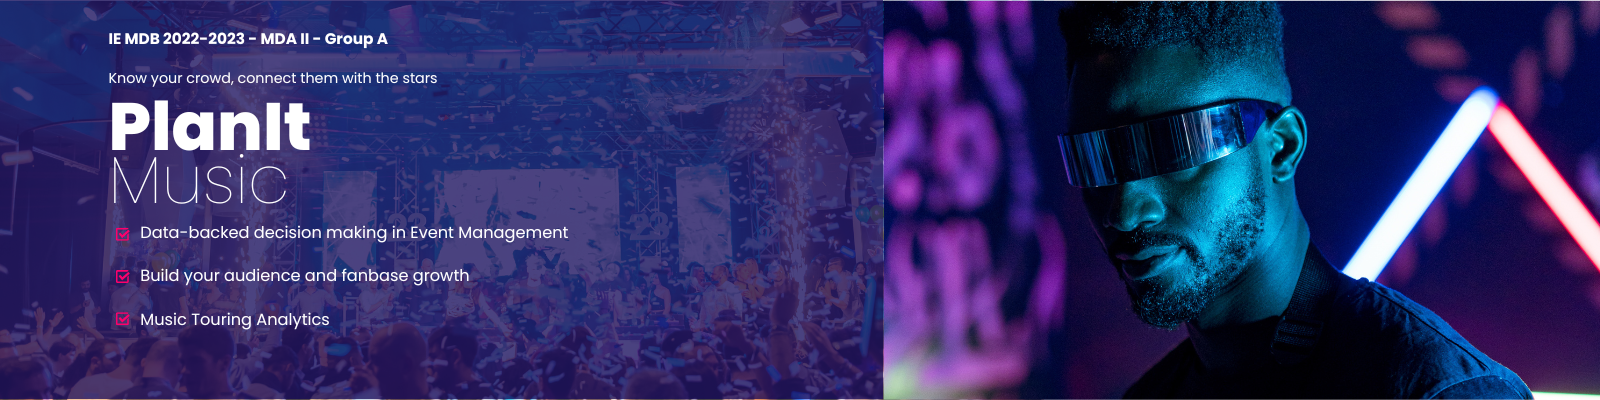

# Goal overview for new project

It is our new project to organize the "Maria-Molina" festival in Los Angeles. Therefore we are keen to analyse the Music Taste of our audience and identity aritists and songs for our festival. We are looking at two categories of artists: The featured artists(main acts) and opening artists). 

Overview Business question we want to address:
    
1. Identity which of the artist in the current Top 100 US should perform at our festival to be our FEATURED ARTISTS
    
2. What ranking these 5 Featured artists are based on number of songs on top charts and how many songs our featured artists 
    have had in the top charts in 2022?
    
3. Understand which of related artist to the Featured 5 artist should play as opening bands. (ONLY FOR THE WEEKND and the     Related artists associated to THE WEEKND)
    
4. Understand which of the songs all artists should play

5. Provide additional recommendation on which otehr singers our main artists should be collaborating with, on top to the original related artist reccomendations comming from Spotify

## 1) Identity which of the artist in the current Top 100 US should perform at our festival to be our FEATURED ARTISTS

Outcome we already shortlisted the artists that we are interested in being our featured artists:
    
o Harry Styles

o Bad Bunny 

o One Republic

o John Legend

o The Weeknd


##  Import data for data analysis

In order to analyse our business question in detail we are loading datasets that were ingested through Nifi (either Twitter or Spotify API)

We upload the following data: 
    
    1) The top 10 tracks for 5 main artist ingested through Nifi and saved in HDFS
    2) The  Spotify Top Charts Songs - 2022 from Kaggle
    3) Load Spotify Related Artist Data for 5 Main Artist ingested through Nifi and saved in HDFS 
    4) Load Twitter Data for 5 Main Artist ingested through Nifi and saved in HDFS
    5) Load All Artist Consolidate Tweet for Month per Day

In [19]:
import findspark
findspark.init()

In [20]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [21]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages "graphframes:graphframes:0.8.2-spark3.2-s_2.12" --jars /opt/hive3/lib/hive-hcatalog-core-3.1.2.jar pyspark-shell'

In [22]:
#import os
#os.environ['PYSPARK_SUBMIT_ARGS'] =  '--jars /usr/share/java/mariadb-java-client.jar pyspark-shell'

In [23]:
print(os.environ)

environ({'LANG': 'en_US.UTF-8', 'LANGUAGE': 'en_US:en', 'PATH': '/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin', 'HOME': '/home/osbdet', 'LOGNAME': 'osbdet', 'USER': 'osbdet', 'SHELL': '/bin/bash', 'INVOCATION_ID': '0a88d76326e0497f8d7f2b58a9010aba', 'JOURNAL_STREAM': '8:12332', 'SPARK_HOME': '/opt/spark3', 'PYDEVD_USE_FRAME_EVAL': 'NO', 'JPY_PARENT_PID': '390', 'TERM': 'xterm-color', 'CLICOLOR': '1', 'PAGER': 'cat', 'GIT_PAGER': 'cat', 'MPLBACKEND': 'module://matplotlib_inline.backend_inline', 'PYSPARK_PYTHON': '/usr/bin/python3', 'PYSPARK_SUBMIT_ARGS': '--packages "graphframes:graphframes:0.8.2-spark3.2-s_2.12" --jars /opt/hive3/lib/hive-hcatalog-core-3.1.2.jar pyspark-shell', 'SPARK_AUTH_SOCKET_TIMEOUT': '15', 'SPARK_BUFFER_SIZE': '65536'})


In [24]:
from pyspark.sql.session import SparkSession

spark = (SparkSession.builder
    .appName("Spotify_Twitter")
    .getOrCreate())

We load the aggregated information of our five featured artist considering their images, followers the popularity, the artist name, genre and unique id. 

The information was retrieved through Nifi from the following API: Get Artist

In [25]:
main_artist_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("Main_Artist_DF.csv")            
            .distinct())

In [26]:
main_artist_df.show()

+--------------------+---------+----------+------------+--------------------+--------------------+
|              images|followers|popularity|        name|               genre|           artist_id|
+--------------------+---------+----------+------------+--------------------+--------------------+
|https://i.scdn.co...| 14400245|        85| OneRepublic|          piano rock|5Pwc4xIPtQLFEnJri...|
|https://i.scdn.co...| 23987672|        90|Harry Styles|                 pop|6KImCVD70vtIoJWnq...|
|https://i.scdn.co...| 51405766|        94|  The Weeknd|canadian contempo...|1Xyo4u8uXC1ZmMpat...|
|https://i.scdn.co...|  6291069|        77| John Legend|          neo mellow|5y2Xq6xcjJb2jVM54...|
|https://i.scdn.co...| 57945768|        99|   Bad Bunny|           reggaeton|4q3ewBCX7sLwd24eu...|
+--------------------+---------+----------+------------+--------------------+--------------------+



In [27]:
# Create a Main Artist Dict
main_artist_dict = {"OneRepublic":"5Pwc4xIPtQLFEnJriah9YJ", "Harry Styles":"6KImCVD70vtIoJWnq6nGn3", "The Weeknd":"1Xyo4u8uXC1ZmMpatF05PJ", "John Legend":"5y2Xq6xcjJb2jVM54GHK3t" ,"Bad Bunny":"4q3ewBCX7sLwd24euuV69X"}

### Load Spotify Top 10 Tracks  for 5 Main Artists Data

In [28]:
top_tracks_main_artist = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/artist_top_tracks")            
            .distinct())

In [29]:
top_tracks_main_artist.show()

+-----------+------------+--------------------+--------------------+---------------+--------------------+--------------------+
|duration_ms|release_date|          artists_id|                name|   artists_name|                  id|           artist_id|
+-----------+------------+--------------------+--------------------+---------------+--------------------+--------------------+
|     189373|  2022-07-29|07YUOmWljBTXwIseA...|       Tacones Rojos|Sebastian Yatra|4slJBQR5P1JjEH9HF...|5y2Xq6xcjJb2jVM54...|
|     200040|  2020-03-20|1Xyo4u8uXC1ZmMpat...|     Blinding Lights|     The Weeknd|0VjIjW4GlUZAMYd2v...|1Xyo4u8uXC1ZmMpat...|
|     196906|  2020-06-19|5y2Xq6xcjJb2jVM54...|Wild (feat. Gary ...|    John Legend|4rVW6XqAsSaf5vOwc...|5y2Xq6xcjJb2jVM54...|
|     207133|  2019-12-13|6KImCVD70vtIoJWnq...|           Adore You|   Harry Styles|3jjujdWJ72nww5eGn...|6KImCVD70vtIoJWnq...|
|     177954|  2022-05-20|6KImCVD70vtIoJWnq...|  Late Night Talking|   Harry Styles|1qEmFfgcLObUfQm0j...|6KImCV

### Load Spotify Top Charts Songs - 2022 

In the top charts of 2022, we analyse each artist, how long they are in the charts and the audio features of the song they have in the charts. 

In [30]:
spotify_top_charts_22 = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/spotify_top_charts_22.csv")            
            .distinct())

In [31]:
spotify_top_charts_22.show()
spotify_top_charts_22.printSchema()

+--------------------+--------------------+--------------------+---------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+--------------+-----------+
|                 uri|        artist_names|          track_name|peak_rank|weeks_on_chart|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|  tempo|time_signature|duration_ms|
+--------------------+--------------------+--------------------+---------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+--------------+-----------+
|spotify:track:4zN...|James Hype, Miggy...|             Ferrari|       36|            10|       0.847|  0.69|  1|  -7.877|   0|     0.0493|      0.0127|          6.0E-5|  0.0526|125.004|             4|     186662|
|spotify:track:1E5...|          The Weeknd|        Best Friends|       26|             2|       0.737| 0.564|  4|  -7.045|   0|      0.105|     

### Load Spotify Related Artist Data for 5 Main Artist

In [32]:
related_artist_main_artist = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/related_artist")            
            .distinct())

In [33]:
related_artist_main_artist.show()

+--------------------+---------+----------+-------------------+-----------------+--------------------+--------------------+
|              images|followers|popularity|               name|            genre|                  id|           artist_id|
+--------------------+---------+----------+-------------------+-----------------+--------------------+--------------------+
|https://i.scdn.co...|   479538|        56|        Mat Kearney|     acoustic pop|2NQEwAVHBNcI0tGML...|5Pwc4xIPtQLFEnJri...|
|https://i.scdn.co...|  2159260|        56|             Tyrese| contemporary r&b|08p7B5OtcUuVblvkQ...|5y2Xq6xcjJb2jVM54...|
|https://i.scdn.co...|   603702|        49|         Eric Benét| contemporary r&b|1kjO72M26jZkv0aaG...|5y2Xq6xcjJb2jVM54...|
|https://i.scdn.co...|  1369846|        75|    Phoebe Bridgers|        indie pop|1r1uxoy19fzMxunt3...|6KImCVD70vtIoJWnq...|
|https://i.scdn.co...|  7529029|        73|         The Script|      celtic rock|3AQRLZ9PuTAozP28S...|5Pwc4xIPtQLFEnJri...|
|https:/

### Load Twitter Data for 5 Main Artist

In [34]:
one_republic_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/one_republic.json")            
            .distinct())

In [35]:
harry_styles_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/harry_styles.json")            
            .distinct())

In [36]:
john_legend_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/john_legend.json")            
            .distinct())

In [37]:
bad_bunny_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/bad_bunny.json")            
            .distinct())

In [38]:
the_weekend_tweet_df  = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/the_weekend.json")            
            .distinct())

### Load All Artist Consolidate Tweet for Month per Day

In [39]:
consolidated_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("twitter/consolidated_artists_tweets_count.csv")            
            .distinct())

### Load Main Artist Consolidate Tweet for Month per Day

In [40]:
from pyspark.sql.functions import *
consolidated_tweet_df.show()

+-------------------+-------------------+-----------+------------+--------------------+
|                end|              start|tweet_count|        name|           artist_id|
+-------------------+-------------------+-----------+------------+--------------------+
|2022-09-07 02:00:00|2022-09-06 02:00:00|       5056|      J.Cole|6l3HvQ5sa6mXTsMTB...|
|2022-09-02 02:00:00|2022-09-01 02:00:00|      24428|      J.Cole|6l3HvQ5sa6mXTsMTB...|
|2022-09-29 02:00:00|2022-09-28 02:00:00|       3226|Harry Styles|6KImCVD70vtIoJWnq...|
|2022-09-06 02:00:00|2022-09-05 02:00:00|        751|One Republic|10Pwc4xIPtQLFEnJr...|
|2022-09-14 02:00:00|2022-09-13 02:00:00|        921|One Republic|18Pwc4xIPtQLFEnJr...|
|2022-09-28 02:00:00|2022-09-27 02:00:00|        404|       6LACK|4IVAbR2w4JJNJDDRF...|
|2022-09-07 02:00:00|2022-09-06 02:00:00|       2266|   Bad Bunny|10q3ewBCX7sLwd24e...|
|2022-09-24 02:00:00|2022-09-23 02:00:00|         11|Majid Jordan|27HzKw8XcD0piJmDr...|
|2022-09-13 02:00:00|2022-09-12 

# 5 Main Artist Tweet Count for Month

In [41]:
from pyspark.sql.functions import when, lit, col, create_map

main_artist_tweet_count_df = main_artist_df.withColumn("tweets_last_month",
              when((main_artist_df.name  == "OneRepublic"), one_republic_tweet_df.select(sum("tweet_count")).first()[0]).
              when((main_artist_df.name  == "Harry Styles"), harry_styles_tweet_df.select(sum("tweet_count")).first()[0]).
              when((main_artist_df.name  == "John Legend"), john_legend_tweet_df.select(sum("tweet_count")).first()[0]).
              when((main_artist_df.name  == "Bad Bunny"), bad_bunny_tweet_df.select(sum("tweet_count")).first()[0]).
              when((main_artist_df.name  == "The Weeknd"), the_weekend_tweet_df.select(sum("tweet_count")).first()[0]))

main_artist_tweet_count_df.show()

+--------------------+---------+----------+------------+--------------------+--------------------+-----------------+
|              images|followers|popularity|        name|               genre|           artist_id|tweets_last_month|
+--------------------+---------+----------+------------+--------------------+--------------------+-----------------+
|https://i.scdn.co...| 14400245|        85| OneRepublic|          piano rock|5Pwc4xIPtQLFEnJri...|            48225|
|https://i.scdn.co...| 23987672|        90|Harry Styles|                 pop|6KImCVD70vtIoJWnq...|           169904|
|https://i.scdn.co...| 51405766|        94|  The Weeknd|canadian contempo...|1Xyo4u8uXC1ZmMpat...|            20792|
|https://i.scdn.co...|  6291069|        77| John Legend|          neo mellow|5y2Xq6xcjJb2jVM54...|           195074|
|https://i.scdn.co...| 57945768|        99|   Bad Bunny|           reggaeton|4q3ewBCX7sLwd24eu...|            57322|
+--------------------+---------+----------+------------+--------

# Business Questions - I

### A. What ranking these 5 Featured artists are based on number of songs on top charts, and how many songs our feature artist has had in the top charts in 2022?

### B. On average, for how many weeks each featured artist has been on the top charts?

In [42]:
top_5_artist_list = ["OneRepublic", "Harry Styles", "The Weeknd", "John Legend", "Bad Bunny"]

# save top chart songs for 5 main artist including song with featured artist
spotify_top_charts_22_main_artist = spotify_top_charts_22.filter(col("artist_names").contains("OneRepublic") |
                                                       col("artist_names").contains("Harry Styles") |
                                                       col("artist_names").contains("The Weeknd") |
                                                       col("artist_names").contains("John Legend") |
                                                       col("artist_names").contains("Bad Bunny")
                                                      ) 

spotify_top_charts_22_main_artist_ = spotify_top_charts_22_main_artist.withColumn("main_artist",
              when((spotify_top_charts_22_main_artist.artist_names.contains("OneRepublic")), lit("OneRepublic")).
              when((spotify_top_charts_22_main_artist.artist_names.contains("Harry Styles")), lit("Harry Styles")).
              when((spotify_top_charts_22_main_artist.artist_names.contains("The Weeknd")), lit("The Weeknd")).
              when((spotify_top_charts_22_main_artist.artist_names.contains("John Legend")), lit("John Legend")).
              when((spotify_top_charts_22_main_artist.artist_names.contains("Bad Bunny")), lit("Bad Bunny"))
             )

# A. Total Song in Top Charts for 5 Main Artist
# B. On average, for how many weeks each featured artist has been on the top charts?

spotify_top_charts_22_main_artist_.groupBy("main_artist")\
    .agg(count("*").alias("Total Song on Top Chart"), avg("weeks_on_chart").alias("Average Week on Top Charts"))\
.withColumnRenamed("main_artist","Artist").show(truncate=False)

+------------+-----------------------+--------------------------+
|Artist      |Total Song on Top Chart|Average Week on Top Charts|
+------------+-----------------------+--------------------------+
|Bad Bunny   |35                     |20.285714285714285        |
|OneRepublic |2                      |32.0                      |
|Harry Styles|18                     |25.22222222222222         |
|John Legend |1                      |145.0                     |
|The Weeknd  |32                     |21.15625                  |
+------------+-----------------------+--------------------------+



### C. Do they appear on the top charts as single artist or in collaborations (together with another artists)

In [43]:
# Populate if the artist has collaborated with another artist in the chart
spotify_top_charts_22_main_artist_collaboration = spotify_top_charts_22_main_artist_.withColumn("collaboration",
              when((spotify_top_charts_22_main_artist.artist_names.startswith("OneRepublic") & spotify_top_charts_22_main_artist.artist_names.endswith("OneRepublic")), False)
              .when((spotify_top_charts_22_main_artist.artist_names.startswith("Harry Styles") & spotify_top_charts_22_main_artist.artist_names.endswith("Harry Styles")), False)
              .when((spotify_top_charts_22_main_artist.artist_names.startswith("The Weeknd") & spotify_top_charts_22_main_artist.artist_names.endswith("The Weeknd")), False)
              .when((spotify_top_charts_22_main_artist.artist_names.startswith("John Legend") & spotify_top_charts_22_main_artist.artist_names.endswith("John Legend")), False)
              .when((spotify_top_charts_22_main_artist.artist_names.startswith("Bad Bunny") & spotify_top_charts_22_main_artist.artist_names.endswith("Bad Bunny")), False)
              .otherwise(True)) 

spotify_top_charts_22_main_artist_collaboration.show()
# Group Solo Artist song and their collaboration song and find sum of the week on charts

collboration_grouped_df = spotify_top_charts_22_main_artist_collaboration.groupBy(["main_artist","collaboration"])\
    .agg(count("*").alias("total_song"), sum("weeks_on_chart").alias("sum_week_on_charts"))

collboration_grouped_df.show()

+--------------------+--------------------+--------------------+---------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+--------------+-----------+------------+-------------+
|                 uri|        artist_names|          track_name|peak_rank|weeks_on_chart|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|  tempo|time_signature|duration_ms| main_artist|collaboration|
+--------------------+--------------------+--------------------+---------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+--------------+-----------+------------+-------------+
|spotify:track:1E5...|          The Weeknd|        Best Friends|       26|             2|       0.737| 0.564|  4|  -7.045|   0|      0.105|       0.436|             0.0|   0.351|   90.0|             4|     163504|  The Weeknd|        false|
|spotify:track:759...|          The 

Weeknd, Bad Bunny, Harry Styles, OneRepublic and John Legend without any collaboration. Bad Bunny as a solo artist has collaborations. 

### Analytical - Window Function to return the if the maximum of sum of week on charts as by single or in collaboration with featuring artist

In [44]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col, row_number

windowDept = Window.partitionBy("main_artist").orderBy(col("sum_week_on_charts").desc())
collboration_grouped_df.withColumn("row",row_number().over(windowDept)) \
  .filter(col("row") == 1).drop("row").show()

+------------+-------------+----------+------------------+
| main_artist|collaboration|total_song|sum_week_on_charts|
+------------+-------------+----------+------------------+
|   Bad Bunny|         true|        16|               471|
|Harry Styles|        false|        18|               454|
| John Legend|        false|         1|               145|
| OneRepublic|        false|         2|                64|
|  The Weeknd|        false|        20|               359|
+------------+-------------+----------+------------------+



# Business Questions - II

### A. Is popularity rank in Spotify aligned to the total amount of tweets we have observed during the last month?

In [45]:
# Sort the popularity of tweets for the artist
main_artist_tweet_count_df = main_artist_tweet_count_df.sort("popularity")
main_artist_tweet_count_df.show()

+--------------------+---------+----------+------------+--------------------+--------------------+-----------------+
|              images|followers|popularity|        name|               genre|           artist_id|tweets_last_month|
+--------------------+---------+----------+------------+--------------------+--------------------+-----------------+
|https://i.scdn.co...|  6291069|        77| John Legend|          neo mellow|5y2Xq6xcjJb2jVM54...|           195074|
|https://i.scdn.co...| 14400245|        85| OneRepublic|          piano rock|5Pwc4xIPtQLFEnJri...|            48225|
|https://i.scdn.co...| 23987672|        90|Harry Styles|                 pop|6KImCVD70vtIoJWnq...|           169904|
|https://i.scdn.co...| 51405766|        94|  The Weeknd|canadian contempo...|1Xyo4u8uXC1ZmMpat...|            20792|
|https://i.scdn.co...| 57945768|        99|   Bad Bunny|           reggaeton|4q3ewBCX7sLwd24eu...|            57322|
+--------------------+---------+----------+------------+--------

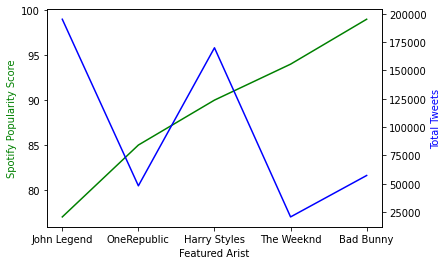

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark Dataframe to Pandas() dataframe
main_artist_tweet_count_df = main_artist_tweet_count_df.toPandas()

x = main_artist_tweet_count_df['name']
y1 = main_artist_tweet_count_df['popularity']
y2 = main_artist_tweet_count_df['tweets_last_month']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Featured Arist', color = 'black')
ax1.set_ylabel('Spotify Popularity Score', color = 'g')
ax2.set_ylabel('Total Tweets', color = 'b')

plt.show()

For John Legend we see it is not aligned as there are a lot of tweet but popularity is low.. 
For the Weeknd and Bad Bunny it seems to be the other way around, a lot of streams, but less tweets. 

### B. Has any of the features artist increase/decreased popularity in the last month?

In [47]:
import numpy as np
def trendline(index,data, order=1):
    coeffs = np.polyfit(index, list(data), order)
    slope = coeffs[-2]
    if float(slope) == 0:
        return "Neutral"
    return "Increasing" if float(slope) > 0 else "Decreasing"

total_tweet = one_republic_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = one_republic_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for OneRepublic is : {trendline(index,sequence)}") 

total_tweet = harry_styles_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = harry_styles_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for Harry Styles is : {trendline(index,sequence)}") 

total_tweet = john_legend_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = john_legend_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for John Legend is : {trendline(index,sequence)}") 

total_tweet = bad_bunny_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = bad_bunny_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for Bad Bunny is : {trendline(index,sequence)}") 

total_tweet = the_weekend_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = the_weekend_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for The Weeknd is : {trendline(index,sequence)}") 

Twitter Trend for OneRepublic is : Increasing


Twitter Trend for Harry Styles is : Increasing
Twitter Trend for John Legend is : Increasing
Twitter Trend for Bad Bunny is : Decreasing
Twitter Trend for The Weeknd is : Decreasing


#### Reference : https://stackoverflow.com/questions/55649356/how-can-i-detect-if-trend-is-increasing-or-decreasing-in-time-series

# Business Questions - III

### A. What is the popularity of the related artists according to the degree of popularity and number of followers? 

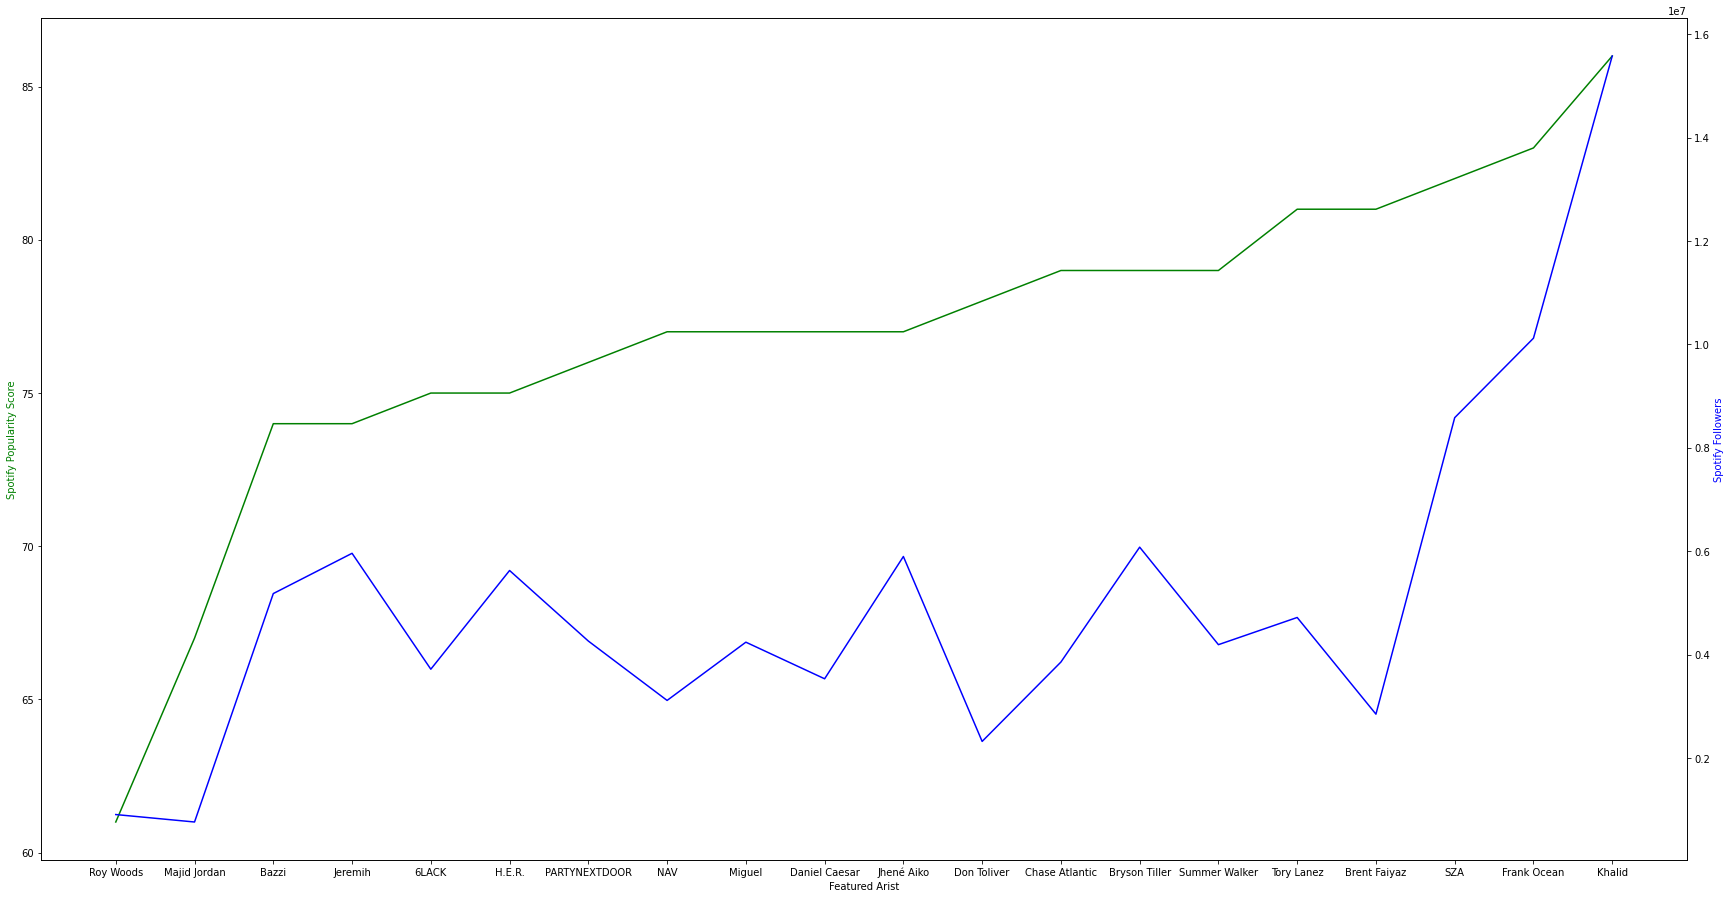

In [48]:
the_weekend_related_artist = related_artist_main_artist.filter(related_artist_main_artist["artist_id"] == '1Xyo4u8uXC1ZmMpatF05PJ')
popularity_meter = the_weekend_related_artist.sort("popularity")
popularity_meter = popularity_meter.toPandas()


x = popularity_meter['name']
y1 = popularity_meter['popularity']
y2 = popularity_meter['followers']

fig, ax1 = plt.subplots()
fig.set_size_inches(29.5, 15.5)


ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Featured Arist', color = 'black')
ax1.set_ylabel('Spotify Popularity Score', color = 'g')
ax2.set_ylabel('Spotify Followers', color = 'b')

plt.show()


### B. What is the popularity of the related artists according to the count of tweets of the last month?
Considering only 'The Weeknd' | Artist Id - 1Xyo4u8uXC1ZmMpatF05PJ

In [49]:
list_of_related_artist = list(the_weekend_related_artist.select("name").toPandas().values.reshape(-1))
print(list_of_related_artist)

['6LACK', 'Khalid', 'Chase Atlantic', 'NAV', 'Don Toliver', 'Majid Jordan', 'Bryson Tiller', 'Bazzi', 'Tory Lanez', 'H.E.R.', 'Summer Walker', 'Brent Faiyaz', 'SZA', 'Miguel', 'Daniel Caesar', 'Jhené Aiko', 'PARTYNEXTDOOR', 'Roy Woods', 'Frank Ocean', 'Jeremih']


### Find Twitter Trend for Related Artist for 'The Weeknd'

In [50]:
related_consolidated_tweet_df = consolidated_tweet_df.filter(consolidated_tweet_df.name.isin(list_of_related_artist))
related_artist_sum_tweets_df = related_consolidated_tweet_df.groupBy("name")\
    .agg(sum("tweet_count").alias("total_tweet"))
related_artist_sum_tweets_df.show()

+-------------+-----------+
|         name|total_tweet|
+-------------+-----------+
|Bryson Tiller|       8696|
|PARTYNEXTDOOR|      31552|
|        6LACK|      22678|
| Majid Jordan|        384|
| Brent Faiyaz|      79037|
+-------------+-----------+



In [51]:
matched_list_of_related_artist = list(related_consolidated_tweet_df.dropDuplicates(["name"]).select("name").toPandas().values.reshape(-1))
print(matched_list_of_related_artist)

['Bryson Tiller', 'PARTYNEXTDOOR', '6LACK', 'Majid Jordan', 'Brent Faiyaz']


In [52]:
from collections import defaultdict
related_artist_twitter_trend = defaultdict(int)

for artist in matched_list_of_related_artist:
    df = related_consolidated_tweet_df.filter(related_consolidated_tweet_df.name == artist).sort("start")
    total_tweet = df.count()
    index = list(range(1, total_tweet+1))
    sequence = df.select("tweet_count").toPandas().values.reshape(-1)
    result = trendline(index,sequence)
    print(f"Twitter Trend for {artist} is : {result}")
    result_value = None
    if result == "Increasing":
        result_value = 1
    if result == "Neutral":
        result_value = 0
    if result == "Decreasing":
        result_value = -1
    related_artist_twitter_trend[artist] = result_value

Twitter Trend for Bryson Tiller is : Increasing
Twitter Trend for PARTYNEXTDOOR is : Increasing
Twitter Trend for 6LACK is : Increasing
Twitter Trend for Majid Jordan is : Decreasing
Twitter Trend for Brent Faiyaz is : Increasing


In [53]:
# Find the twiter trends of related artist
map_col = create_map([lit(x) for i in related_artist_twitter_trend.items() for x in i])
related_artist_sum_tweets_df = related_artist_sum_tweets_df.withColumn('trend', map_col[col('name')])
related_artist_sum_tweets_df.show()

# Find the followers for the related artist
popular_score_related_artist = related_artist_sum_tweets_df.join(the_weekend_related_artist,related_artist_sum_tweets_df.name ==  the_weekend_related_artist.name,"left") \
   .select(related_artist_sum_tweets_df["*"], the_weekend_related_artist["followers"])

popular_score_related_artist.show()

+-------------+-----------+-----+
|         name|total_tweet|trend|
+-------------+-----------+-----+
|Bryson Tiller|       8696|    1|
|PARTYNEXTDOOR|      31552|    1|
|        6LACK|      22678|    1|
| Majid Jordan|        384|   -1|
| Brent Faiyaz|      79037|    1|
+-------------+-----------+-----+

+-------------+-----------+-----+---------+
|         name|total_tweet|trend|followers|
+-------------+-----------+-----+---------+
|Bryson Tiller|       8696|    1|  6079846|
|PARTYNEXTDOOR|      31552|    1|  4264095|
|        6LACK|      22678|    1|  3719712|
| Majid Jordan|        384|   -1|   764767|
| Brent Faiyaz|      79037|    1|  2850516|
+-------------+-----------+-----+---------+



### Graph : Total Tweet Vs Spotify Followers

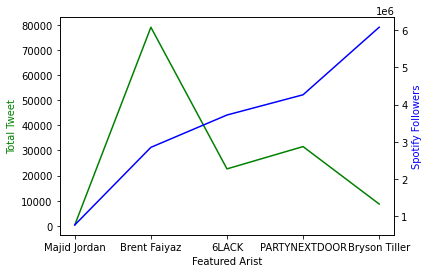

In [54]:
popular_score_related_artist = popular_score_related_artist.sort("followers")
popular_score_related_artist = popular_score_related_artist.toPandas()


x = popular_score_related_artist['name']
y1 = popular_score_related_artist['total_tweet']
y2 = popular_score_related_artist['followers']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Featured Arist', color = 'black')
ax1.set_ylabel('Total Tweet', color = 'g')
ax2.set_ylabel('Spotify Followers', color = 'b')

plt.show()

### Graph : Tweet Trend Vs Spotify Followers

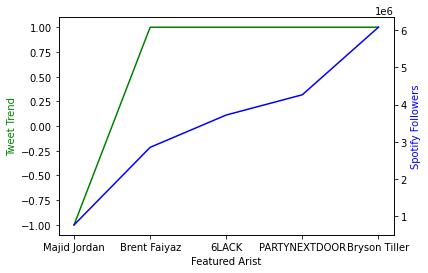

In [55]:
x = popular_score_related_artist['name']
y1 = popular_score_related_artist['trend']
y2 = popular_score_related_artist['followers']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Featured Arist', color = 'black')
ax1.set_ylabel('Tweet Trend', color = 'g')
ax2.set_ylabel('Spotify Followers', color = 'b')

plt.show()

### C. How many tweets will the weeknd have next month, so that we can anticipate how popular he will be?
Considering only 'The Weeknd' | Artist Id - 1Xyo4u8uXC1ZmMpatF05PJ

In [66]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [67]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] =  '--jars /usr/share/java/mariadb-java-client.jar pyspark-shell'

In [68]:
import findspark
findspark.init()

In [69]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [70]:
from pyspark.sql.session import SparkSession
spark = SparkSession.builder\
.appName("artists recomendation")\
.getOrCreate()
print(f"This cluster relies on Spark '{spark.version}'")

This cluster relies on Spark '3.2.1'


#### Importing twitter JSON 


We are going to import 5 json documents obtained from tweeter with the number of twits of the last 31 days. 

In [ ]:
DF_6slack = spark.read.json("hdfs://localhost:9000/datalake/raw/aggregate_tweetpy_queries/the_weeknd/6lack.json")

In [ ]:
DF_6slack.printSchema()
print(f"This DataFrame has {DF_6slack.count()} rows")
type(DF_6slack)

In [ ]:
#here we create a column with the file_name from which we will extract the name of the related artist
from pyspark.sql.functions import input_file_name
DF_6slack_5=DF_6slack.withColumn("file_name",input_file_name()).select("end", "tweet_count", "file_name")

In [ ]:
DF_6slack_5.limit(5).show()

In [ ]:
from pyspark.sql.functions import split
DF_6slack_6=DF_6slack_5.withColumn('json', split(DF_6slack_5['file_name'], '/').getItem(7)).select("end", "tweet_count", "json")

In [ ]:
DF_6slack_7=DF_6slack_6.withColumn('artist', split(DF_6slack_6['json'], '.json').getItem(0)).select("end", "tweet_count", "artist")

In [ ]:
#The data we are interested in is the day the tweee_count and the artist

from pyspark.sql.functions import date_format
from pyspark.sql.functions import to_date

DF_6slack_8 = DF_6slack_7.withColumn("date",to_date("end"))\
.select("date", "tweet_count", "artist")
DF_6slack_8.limit(5).show()

In [ ]:
#now we import the other 4 and we transform them the same way and we join it to previous one
bryson_tiller = spark.read.json("hdfs://localhost:9000/datalake/raw/aggregate_tweetpy_queries/the_weeknd/bryson_tiller.json") 

In [ ]:
ryson_tiller1=bryson_tiller.withColumn("file_name",input_file_name()).select("end", "tweet_count", "file_name")
bryson_tiller2=bryson_tiller1.withColumn('json', split(bryson_tiller1['file_name'], '/').getItem(7)).select("end", "tweet_count", "json")
bryson_tiller3=bryson_tiller2.withColumn('artist', split(bryson_tiller2['json'], '.json').getItem(0)).select("end", "tweet_count", "artist")
bryson_tiller=bryson_tiller3.withColumn("date",to_date("end")).select("date", "tweet_count", "artist")

In [ ]:
brent_faiyaz = spark.read.json("hdfs://localhost:9000/datalake/raw/aggregate_tweetpy_queries/the_weeknd/brent_faiyaz.json") 

In [ ]:
brent_faiyaz1=brent_faiyaz.withColumn("file_name",input_file_name()).select("end", "tweet_count", "file_name")
brent_faiyaz2=brent_faiyaz1.withColumn('json', split(brent_faiyaz1['file_name'], '/').getItem(7)).select("end", "tweet_count", "json")
brent_faiyaz3=brent_faiyaz2.withColumn('artist', split(brent_faiyaz2['json'], '.json').getItem(0)).select("end", "tweet_count", "artist")
brent_faiyaz=brent_faiyaz3.withColumn("date",to_date("end")).select("date", "tweet_count", "artist")

In [ ]:
majid_jordan = spark.read.json("hdfs://localhost:9000/datalake/raw/aggregate_tweetpy_queries/the_weeknd/majid_jordan.json") 

In [ ]:
majid_jordan1=majid_jordan.withColumn("file_name",input_file_name()).select("end", "tweet_count", "file_name")
majid_jordan2=majid_jordan1.withColumn('json', split(majid_jordan1['file_name'], '/').getItem(7)).select("end", "tweet_count", "json")
majid_jordan3=majid_jordan2.withColumn('artist', split(majid_jordan2['json'], '.json').getItem(0)).select("end", "tweet_count", "artist")
majid_jordan=majid_jordan3.withColumn("date",to_date("end")).select("date", "tweet_count", "artist")

In [ ]:
partynextdoor = spark.read.json("hdfs://localhost:9000/datalake/raw/aggregate_tweetpy_queries/the_weeknd/partynextdoor.json") 

In [ ]:
partynextdoor1=partynextdoor.withColumn("file_name",input_file_name()).select("end", "tweet_count", "file_name")
partynextdoor2=partynextdoor1.withColumn('json', split(partynextdoor1['file_name'], '/').getItem(7)).select("end", "tweet_count", "json")
partynextdoor3=partynextdoor2.withColumn('artist', split(partynextdoor2['json'], '.json').getItem(0)).select("end", "tweet_count", "artist")
partynextdoor=partynextdoor3.withColumn("date",to_date("end")).select("date", "tweet_count", "artist")

In [ ]:
df_concat = DF_6slack_8.union(bryson_tiller).select("date", "tweet_count", "artist")
df_concat1 = df_concat.union(brent_faiyaz).select("date", "tweet_count", "artist")
df_concat2 = df_concat1.union(majid_jordan).select("date", "tweet_count", "artist")
df_concat = df_concat2.union(partynextdoor).select("date", "tweet_count", "artist")
df_concat.count()

### Brining together all artists by count

In [ ]:
df_concat.select(['artist']).groupby('artist').agg({'artist': 'count'}).show()

## TIME SERIES WITH FB.PROPHET TO FORECAST FUTURE TWEETS

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from prophet import Prophet
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
#Prophet expects date column to be called "ds" and target column as "y"

DF=df_concat.withColumnRenamed("date","ds").withColumnRenamed("tweet_count", "y").select("ds", "y", "artist")
DF.limit(5).show()
DF.dtypes

In [ ]:
#Now we start with the forecast

In [ ]:
#Now we will create a Temporary view to run the SQL queries on the dataframe. After this, we run a SQL query to find the count of each artist 

DF.createOrReplaceTempView("tweets")
spark.sql("select artist, count(*) from tweets group by artist order by artist").show()

In [ ]:
sql = "SELECT artist, ds, sum(y) FROM tweets GROUP BY artist, ds ORDER BY artist, ds"
spark.sql(sql).show()

In [ ]:
#create a schema for our return object

from pyspark.sql.types import *
result_schema = StructType([
                  StructField('ds', TimestampType()),
                  StructField('artist', StringType()),
                  StructField('y', DoubleType()),
                  StructField('yhat', DoubleType()),
                  StructField('yhat_upper', DoubleType()),
                  StructField('yhat_lower', DoubleType())
])

In [ ]:
#from the Pyspark SQL function we will import Pandas UDF and UDF type and define a function that will have facebook Prophet code

In [ ]:
from pyspark.sql.functions import pandas_udf, PandasUDFType
@pandas_udf(result_schema, PandasUDFType.GROUPED_MAP)
def forecast_tweets(history_pd):

    # instantiate the model, configure the parameters
    model = Prophet(
        interval_width=0.95,
        growth='linear',
        daily_seasonality=False,
        weekly_seasonality=True,
        yearly_seasonality=False,
        seasonality_mode='additive'
    )

    # fit the model
    model.fit(history_pd)

    # configure predictions
    future_pd = model.make_future_dataframe(
        periods=15,
        freq='d',
        include_history=True
    )

    # make predictions
    forecast_pd = model.predict(future_pd)

    
    f_pd = forecast_pd[['ds', 'yhat', 'yhat_upper', 'yhat_lower']].set_index('ds')
    ra_pd = history_pd[['ds', 'artist', 'y']].set_index('ds')
    result_pd = f_pd.join(ra_pd, how='left')
    result_pd.reset_index(level=0, inplace=True)
    result_pd['artist'] = history_pd['artist'].iloc[0]
    return result_pd[['ds', 'artist', 'y', 'yhat', 'yhat_upper', 'yhat_lower']]

In [ ]:
from pyspark.sql.functions import current_date
results = (DF.groupby('artist').apply(forecast_tweets).withColumn('training_date', current_date()))
results.cache()
results.show()

In [ ]:
results.count()

Verifying that the 15 forecasted days are in the DF 

In [ ]:
results.createOrReplaceTempView('forecasted')
spark.sql("SELECT artist, count(*) FROM  forecasted GROUP BY artist").show()

In [ ]:
results.dtypes

In [ ]:
results.printSchema()

In [ ]:
final_df = results.toPandas()

In [ ]:
final_df

In [ ]:
#If we want to see the whole DF
#with pd.option_context('display.max_rows', None,
#                       'display.max_columns', None,
#                       'display.precision', 3,
#                       ):
#    print(final_df)

In [ ]:
y1 = final_df.iloc[:,2]
plt.plot(y1)
plt.show()

In [ ]:
y2 = final_df.iloc[:,3]
plt.plot(y2)
plt.show()

### EXPORTING RESULTS TO THE SERVING LAYER (MARIADB) AS A MYSQL DB

In [ ]:
results.limit(5).show()

In [ ]:
#reshaping the result before sending it to the serving layer

from pyspark.sql.functions import date_format
from pyspark.sql.functions import to_date

results_mdb = results.withColumn("dates",to_date("ds"))\
.select("dates", "artist", "y", "yhat")
results_mdb.limit(5).show()

In [ ]:
results_mdb.printSchema()

In [ ]:
results_mdb2 = results_mdb.withColumn("tweets", results_mdb.y.cast('integer'))

In [ ]:
results_mdb3 = results_mdb2.withColumn("forecasted_tweets", results_mdb.yhat.cast('integer'))

In [ ]:
results_mdb=results_mdb3.select("dates", "artist", "tweets", "forecasted_tweets")

In [ ]:
results_mdb.printSchema()

In [ ]:
results_mdb.limit(5).show()

In [ ]:
from pyspark.sql.functions import when
results_mdb = results_mdb.withColumn("hist_forecast", when(results_mdb.tweets.isNull(), results_mdb.forecasted_tweets)
                                  .otherwise(results_mdb.tweets))

In [ ]:
results_mdb.show(20)

In [ ]:
results_mdb.printSchema()

In [ ]:
results_mdb.filter(col("hist_forecast").isNull()).show()

In [ ]:
url = "jdbc:mysql://localhost:3306/GROUPA"
table = "Forecast"
mode = "overwrite"
props = {"user":"osbdet",
         "password":"osbdet123$", 
         "driver":"org.mariadb.jdbc.Driver"}

In [ ]:
results_mdb.write.jdbc(url,table,mode,props)

# Business Questions - IV

### A. What are the top 5 songs per featured artists?
### B. Has any of those top songs been in the top charts for 2022? For how many weeks?
### C. From the charts find the song name which has been in the maximum in the top charts!

Showing Any Top 5 Song for Artist : OneRepublic


+--------------+
|name          |
+--------------+
|Lose Somebody |
|Apologize     |
|Good Life     |
|Run           |
|Counting Stars|
+--------------+
only showing top 5 rows

Showing Song for Artist : OneRepublic on the Charts Week sorted by Week on Chart


+---------------+------+--------------------+------------+--------------+
|     track_name|energy|           artist_id|artist_names|weeks_on_chart|
+---------------+------+--------------------+------------+--------------+
|I Ain't Worried| 0.797|5Pwc4xIPtQLFEnJri...| OneRepublic|            10|
+---------------+------+--------------------+------------+--------------+



Song which has been in the maximum in the top charts is : I Ain't Worried with 10 week(s) on Charts 


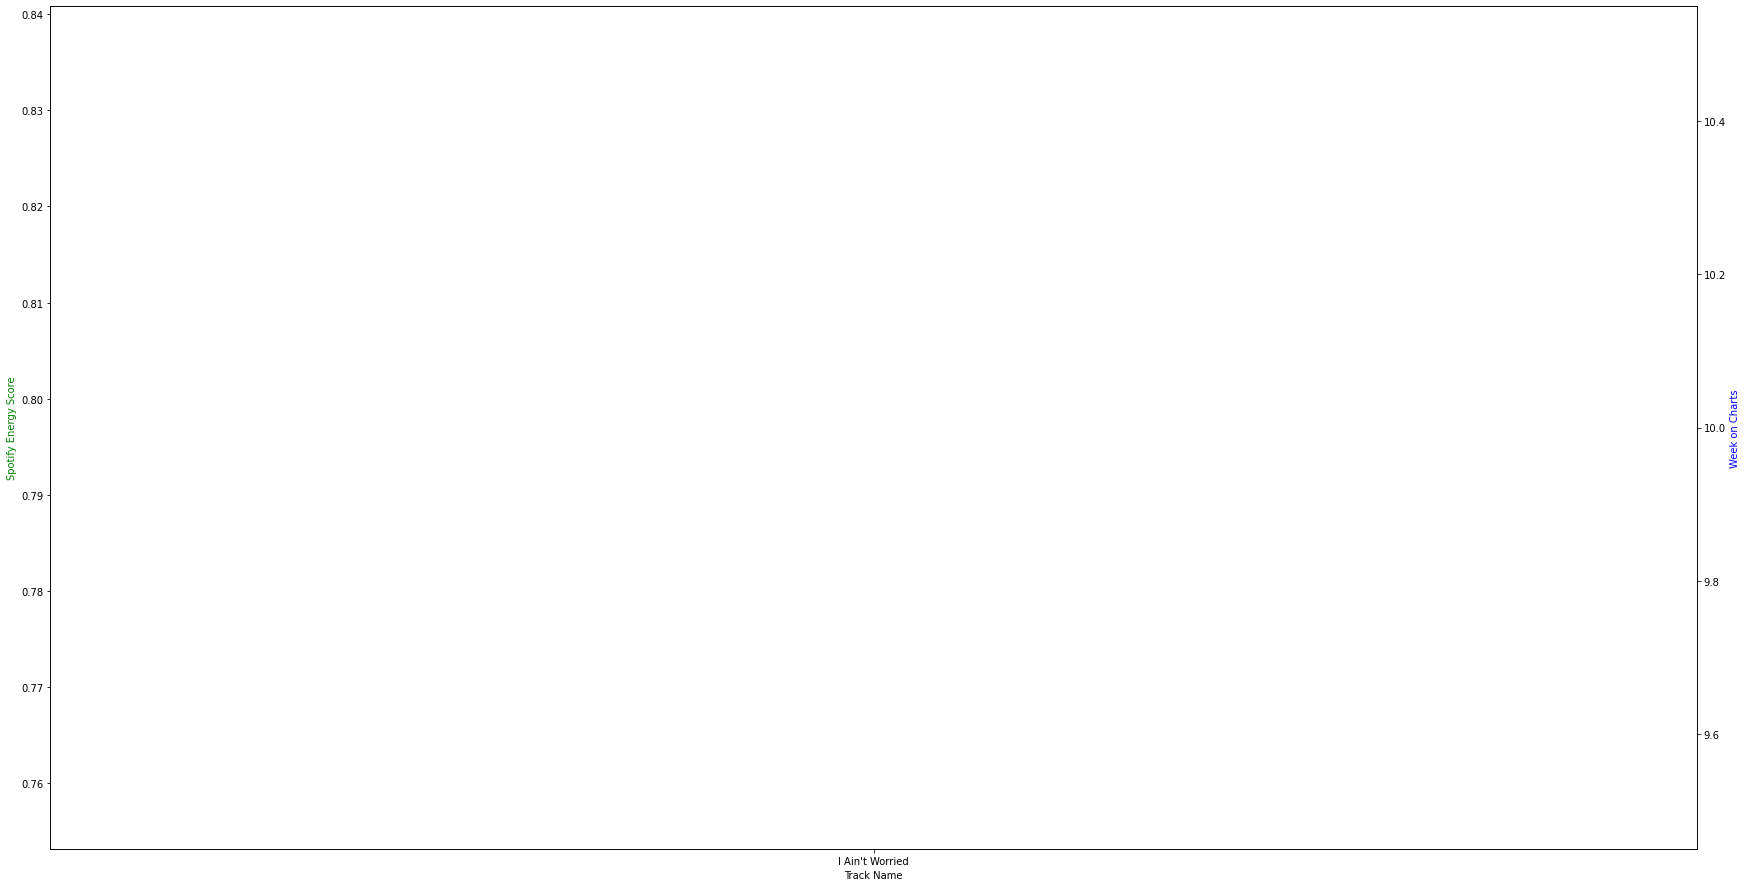

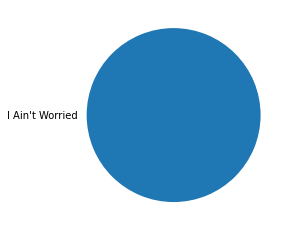

Showing Any Top 5 Song for Artist : Harry Styles
+------------------+
|name              |
+------------------+
|Adore You         |
|Late Night Talking|
|As It Was         |
|Little Freak      |
|Daylight          |
+------------------+
only showing top 5 rows

Showing Song for Artist : Harry Styles on the Charts Week sorted by Week on Chart


+--------------------+------+--------------------+------------+--------------+
|          track_name|energy|           artist_id|artist_names|weeks_on_chart|
+--------------------+------+--------------------+------------+--------------+
|        Little Freak| 0.535|6KImCVD70vtIoJWnq...|Harry Styles|             2|
|            Daylight| 0.445|6KImCVD70vtIoJWnq...|Harry Styles|             2|
|Music For a Sushi...| 0.715|6KImCVD70vtIoJWnq...|Harry Styles|            12|
|             Matilda| 0.294|6KImCVD70vtIoJWnq...|Harry Styles|            12|
|  Late Night Talking| 0.728|6KImCVD70vtIoJWnq...|Harry Styles|            12|
|           As It Was| 0.731|6KImCVD70vtIoJWnq...|Harry Styles|            19|
|   Sign of the Times| 0.595|6KImCVD70vtIoJWnq...|Harry Styles|            39|
|             Falling| 0.267|6KImCVD70vtIoJWnq...|Harry Styles|            81|
|           Adore You| 0.771|6KImCVD70vtIoJWnq...|Harry Styles|           104|
|    Watermelon Sugar| 0.816|6KImCVD70vtIoJWnq...|Ha

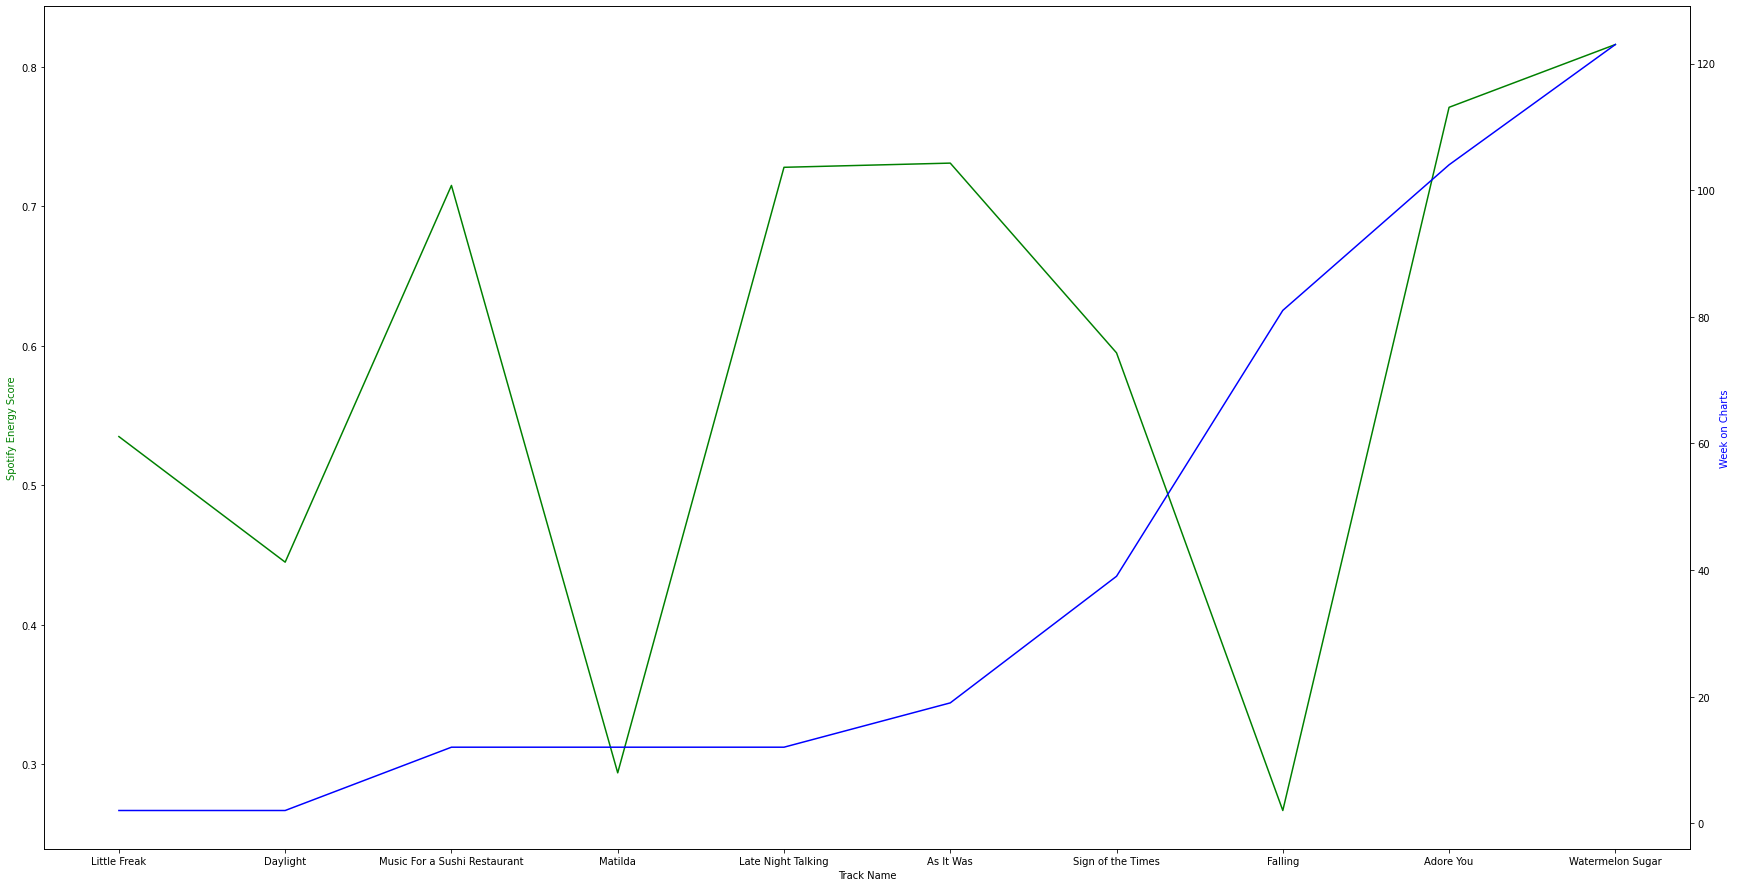

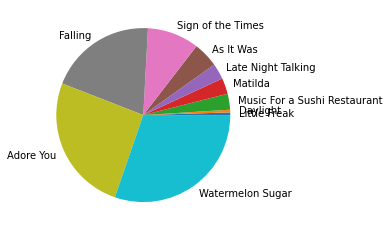

Showing Any Top 5 Song for Artist : The Weeknd


+-----------------+
|name             |
+-----------------+
|Blinding Lights  |
|Starboy          |
|Call Out My Name |
|I Was Never There|
|The Hills        |
+-----------------+
only showing top 5 rows

Showing Song for Artist : The Weeknd on the Charts Week sorted by Week on Chart


+--------------------+------+--------------------+--------------------+--------------+
|          track_name|energy|           artist_id|        artist_names|weeks_on_chart|
+--------------------+------+--------------------+--------------------+--------------+
|   I Was Never There| 0.737|1Xyo4u8uXC1ZmMpat...|The Weeknd, Gesaf...|            10|
|Lost in the Fire ...| 0.671|1Xyo4u8uXC1ZmMpat...|Gesaffelstein, Th...|            21|
|         Die For You| 0.525|1Xyo4u8uXC1ZmMpat...|          The Weeknd|            26|
|           You Right| 0.621|1Xyo4u8uXC1ZmMpat...|Doja Cat, The Weeknd|            39|
|    Call Out My Name| 0.593|1Xyo4u8uXC1ZmMpat...|          The Weeknd|            42|
|Save Your Tears (...| 0.825|1Xyo4u8uXC1ZmMpat...|The Weeknd, Arian...|            48|
|           The Hills| 0.564|1Xyo4u8uXC1ZmMpat...|          The Weeknd|            50|
|     Save Your Tears| 0.826|1Xyo4u8uXC1ZmMpat...|          The Weeknd|            68|
|             Starboy| 0.587|1Xyo4u8uXC1ZmM

Song which has been in the maximum in the top charts is : Blinding Lights with 121 week(s) on Charts 


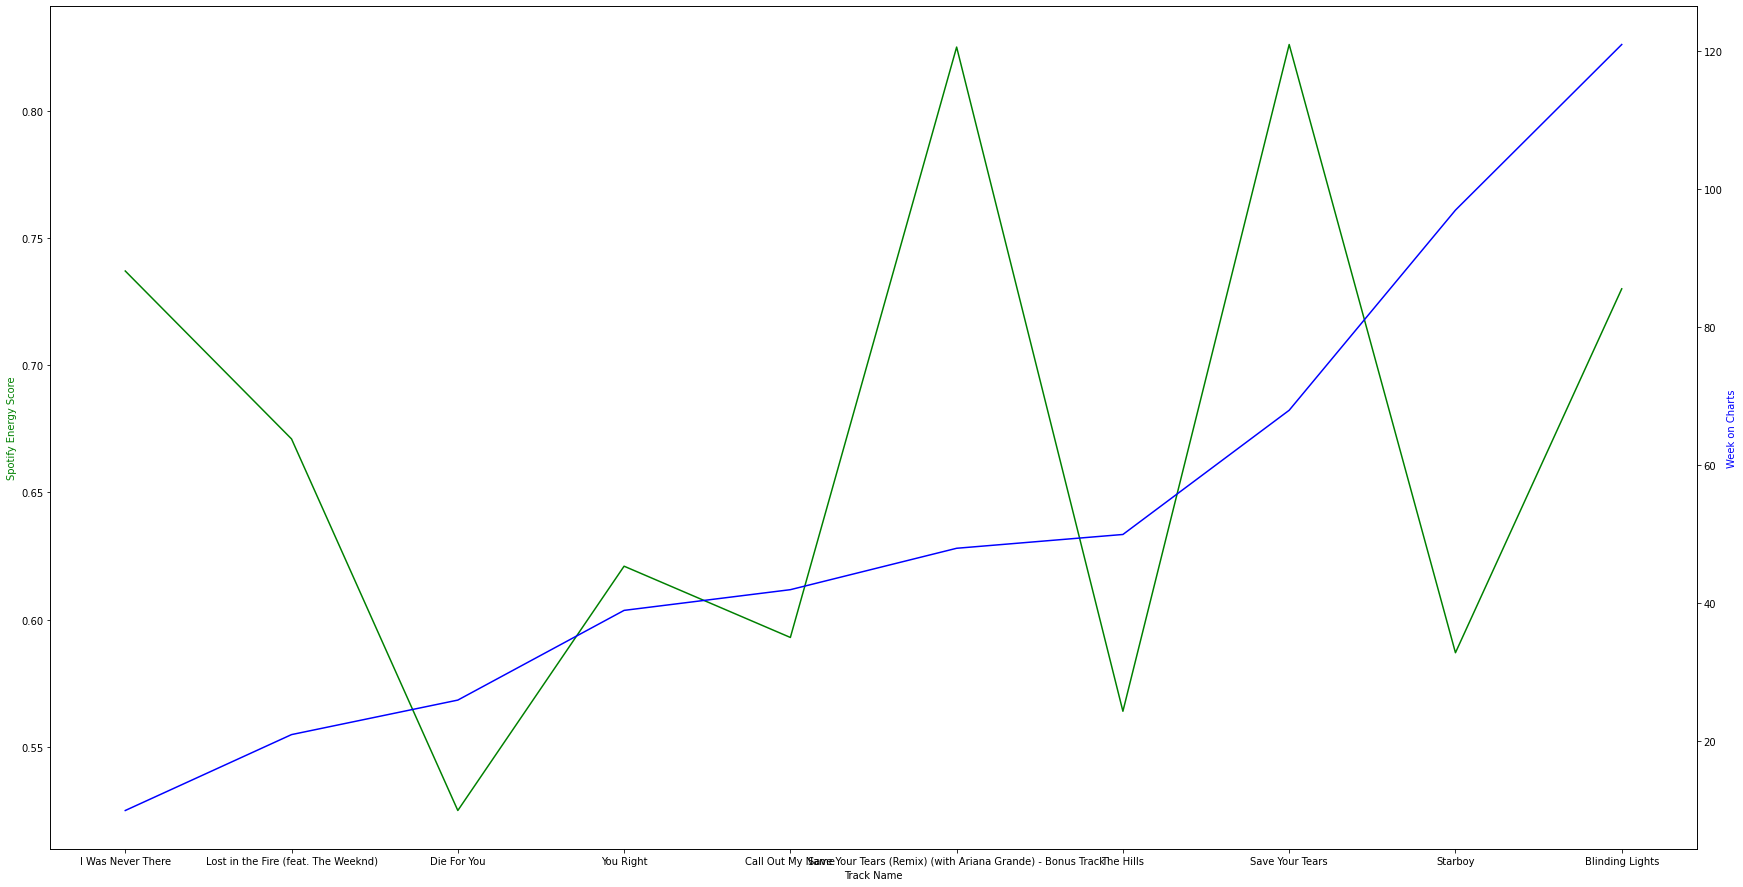

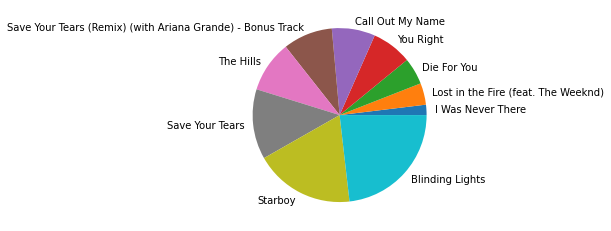

Showing Any Top 5 Song for Artist : John Legend
+---------------------------+
|name                       |
+---------------------------+
|Tacones Rojos              |
|Wild (feat. Gary Clark Jr.)|
|Nervous                    |
|Ordinary People            |
|All of Me                  |
+---------------------------+
only showing top 5 rows

Showing Song for Artist : John Legend on the Charts Week sorted by Week on Chart


+----------+------+--------------------+------------+--------------+
|track_name|energy|           artist_id|artist_names|weeks_on_chart|
+----------+------+--------------------+------------+--------------+
| All of Me| 0.264|5y2Xq6xcjJb2jVM54...| John Legend|           145|
+----------+------+--------------------+------------+--------------+



Song which has been in the maximum in the top charts is : All of Me with 145 week(s) on Charts 


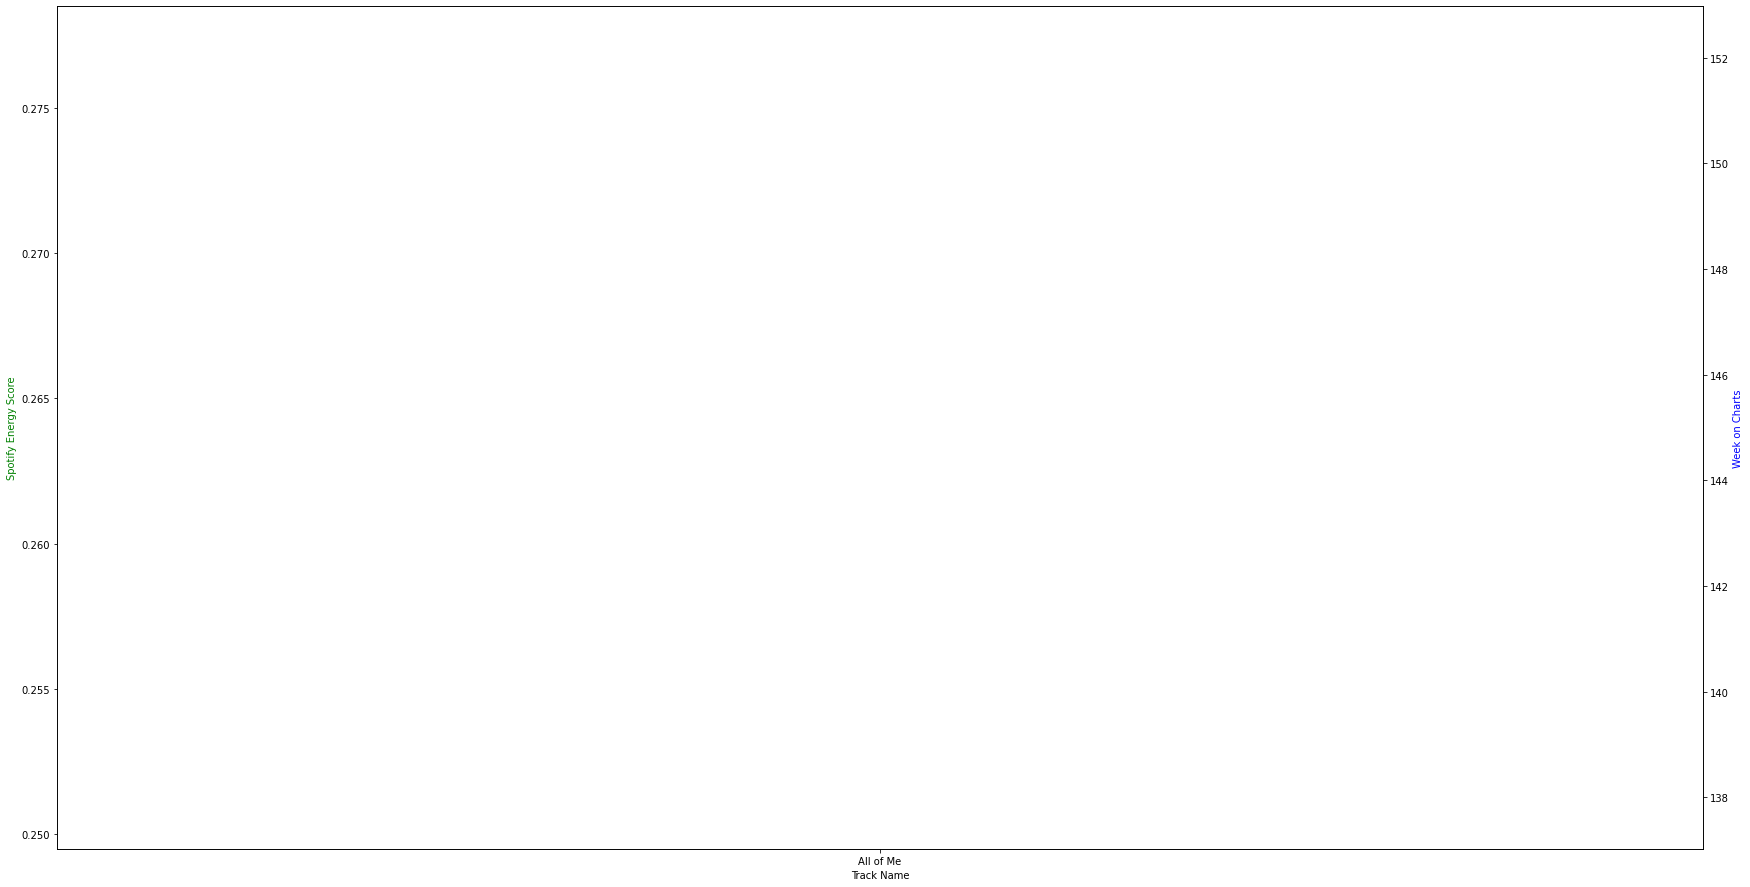

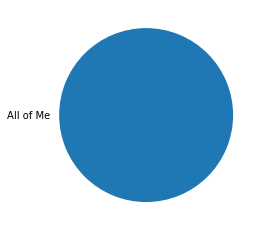

Showing Any Top 5 Song for Artist : Bad Bunny


+----------------+
|name            |
+----------------+
|Party           |
|Me Porto Bonito |
|LA CANCIÓN      |
|Tarot           |
|Tití Me Preguntó|
+----------------+
only showing top 5 rows

Showing Song for Artist : Bad Bunny on the Charts Week sorted by Week on Chart


+----------------+------+--------------------+--------------------+--------------+
|      track_name|energy|           artist_id|        artist_names|weeks_on_chart|
+----------------+------+--------------------+--------------------+--------------+
|        Neverita| 0.498|4q3ewBCX7sLwd24eu...|           Bad Bunny|            14|
|           Tarot| 0.684|4q3ewBCX7sLwd24eu...|Bad Bunny, Jhay C...|            14|
|          Efecto| 0.475|4q3ewBCX7sLwd24eu...|           Bad Bunny|            14|
|Tití Me Preguntó| 0.715|4q3ewBCX7sLwd24eu...|           Bad Bunny|            14|
|           Party| 0.799|4q3ewBCX7sLwd24eu...|Bad Bunny, Rauw A...|            14|
|   Ojitos Lindos| 0.686|4q3ewBCX7sLwd24eu...|Bad Bunny, Bomba ...|            14|
|    La Corriente| 0.786|4q3ewBCX7sLwd24eu...|Bad Bunny, Tony Dize|            14|
|     Moscow Mule| 0.674|4q3ewBCX7sLwd24eu...|           Bad Bunny|            14|
| Me Porto Bonito| 0.712|4q3ewBCX7sLwd24eu...|Bad Bunny, Chench...|            14|
|   

Song which has been in the maximum in the top charts is : LA CANCIÓN with 64 week(s) on Charts 


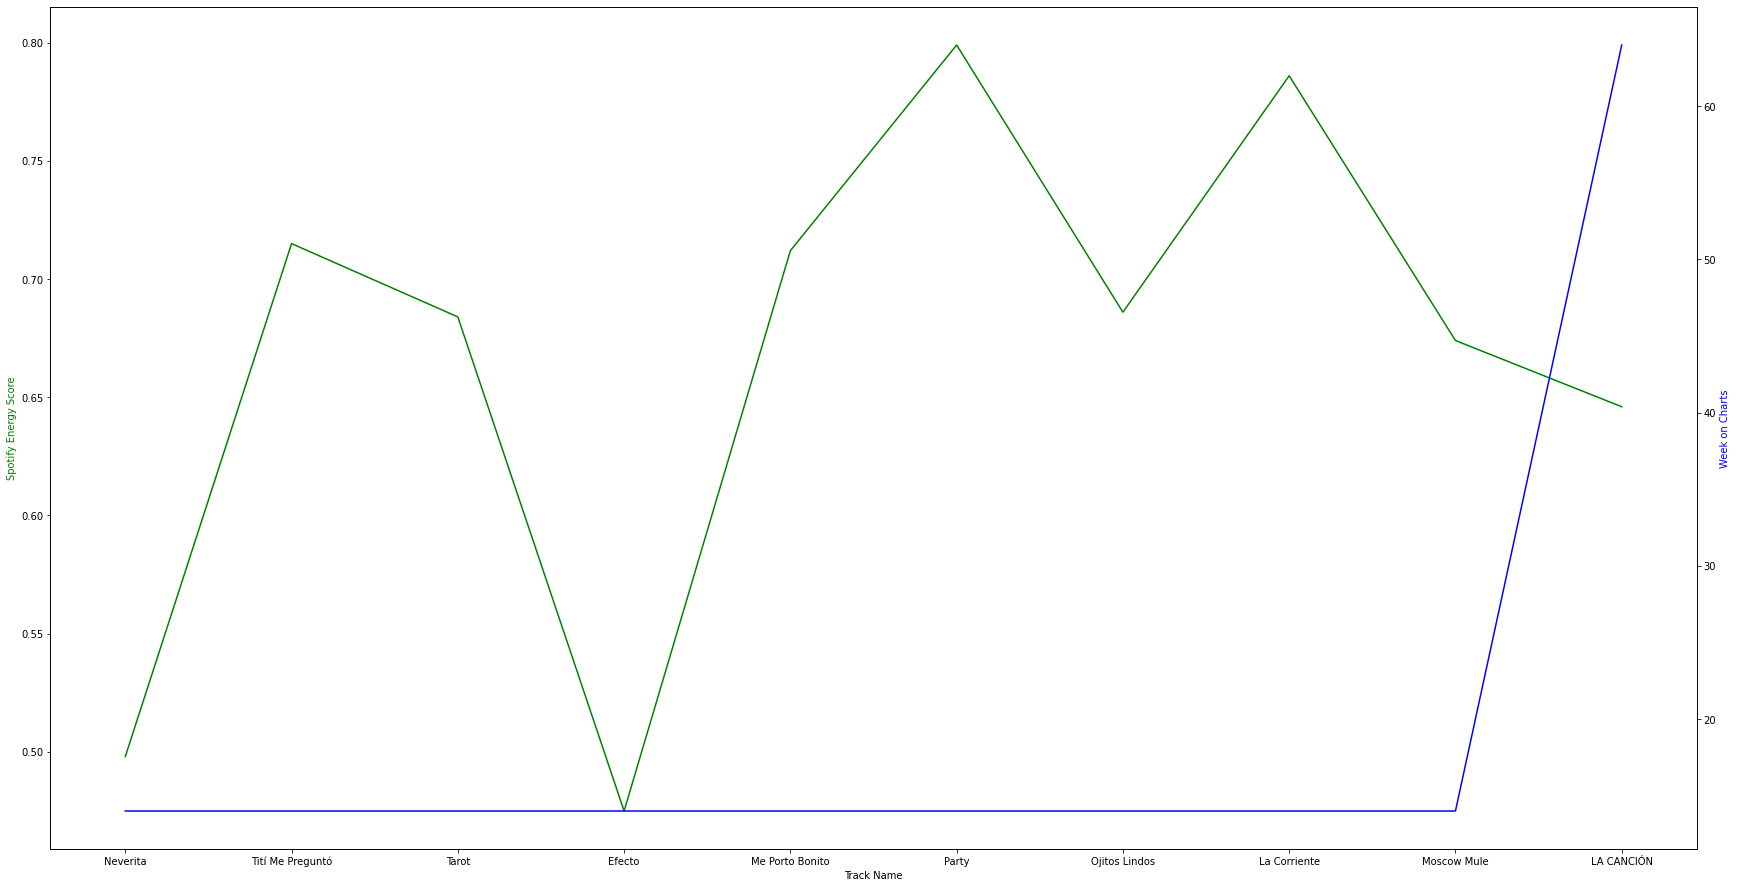

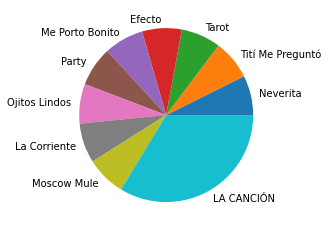

In [56]:
# Clean up top-chart Song Id - spotify:track:02MWAaffLxlfxAUY7c5dvx -->  02MWAaffLxlfxAUY7c5dvx
spotify_top_charts_22_cleaned = spotify_top_charts_22.withColumn("uri", split(spotify_top_charts_22['uri'], ':').getItem(2))

for artist,artist_id in main_artist_dict.items():
    print(f"Showing Any Top 5 Song for Artist : {artist}")
    top_tracks = top_tracks_main_artist.filter(top_tracks_main_artist["artist_id"]==artist_id)
    top_tracks.select("name").show(5, truncate=False)
    
    print(f"Showing Song for Artist : {artist} on the Charts Week sorted by Week on Chart")
    song_on_the_chart = top_tracks.join(spotify_top_charts_22_cleaned,top_tracks.id ==  spotify_top_charts_22_cleaned.uri,"inner")
    song_on_the_chart = song_on_the_chart.select(["track_name", "energy","artist_id", "artist_names", "weeks_on_chart"]).sort("weeks_on_chart")
    song_on_the_chart.show()
    
    print(f"Song which has been in the maximum in the top charts is : {song_on_the_chart.tail(1)[0].__getitem__('track_name')} with {song_on_the_chart.tail(1)[0].__getitem__('weeks_on_chart')} week(s) on Charts ")

    song_popularity_meter = song_on_the_chart.toPandas()

    x = song_popularity_meter['track_name']
    y1 = song_popularity_meter['energy']
    y2 = song_popularity_meter['weeks_on_chart']

    fig, ax1 = plt.subplots()
    fig.set_size_inches(29.5, 15.5)

    ax2 = ax1.twinx()

    ax1.plot(x, y1, 'g-')
    ax2.plot(x, y2, 'b-')

    ax1.set_xlabel('Track Name', color = 'black')
    ax1.set_ylabel('Spotify Energy Score', color = 'g')
    ax2.set_ylabel('Week on Charts', color = 'b')
    
    plt.show()
    plt.pie(song_popularity_meter['weeks_on_chart'], labels=song_popularity_meter['track_name'])

    plt.show()

# Spark Machine Learning - K-Means Cluster

### K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. In this topic, we will learn what is K-means clustering algorithm, how the algorithm works, along with the Python implementation of k-means clustering.

# Load Historical Songs

In [57]:
historical_songs_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("HistoricalTracks.csv")            
            .distinct())

In [58]:
# Create A feature Vector
from pyspark.ml.feature import VectorAssembler

feature_columns = ["acoustics", "danceability", "instrumentalness", "energy"  ,"speechiness"]

assembler = VectorAssembler(inputCols=feature_columns,outputCol='featureVector')
historical_songs_df = assembler.transform(historical_songs_df)
historical_songs_df.show()

+-------+--------------------+----------+--------------------+--------------------+------------+------------------+----------------+--------+--------------------+------------+------------+---------------+------------+------+----+--------+----+-----------+---------+----------------+----------+-------+-------+-----------+--------------+---------+------------------+---+--------+-----------+-----------+--------------------+--------------------+
|Country|                 Uri|Popularity|               Title|              Artist|Album/Single|             Genre|Artist_followers|Explicit|               Album|Release_date|Track_number|Tracks_in_album|danceability|energy| key|loudness|mode|speechiness|acoustics|instrumentalness|liveliness|valence|  tempo|duration_ms|time_signature|Genre_new|Days_since_release|USA|Popu_max|Top10_dummy|Top50_dummy|             Cluster|       featureVector|
+-------+--------------------+----------+--------------------+--------------------+------------+--------------

## Prepare a Feature dataframe to train the model

In [59]:
X = historical_songs_df.select(["acoustics", "danceability", "instrumentalness", "energy"  ,"speechiness", "featureVector"])
X.show()

+---------+------------+----------------+------+-----------+--------------------+
|acoustics|danceability|instrumentalness|energy|speechiness|       featureVector|
+---------+------------+----------------+------+-----------+--------------------+
|    0.278|       0.694|         1.34E-6| 0.758|      0.218|[0.278,0.694,1.34...|
|  0.00948|       0.769|         6.65E-5| 0.829|     0.0661|[0.00948,0.769,6....|
|  0.00988|       0.448|             0.0| 0.435|      0.039|[0.00988,0.448,0....|
|    0.984|       0.742|         5.78E-5| 0.432|     0.0615|[0.984,0.742,5.78...|
|    0.653|       0.735|           0.918| 0.525|     0.0441|[0.653,0.735,0.91...|
|    0.337|       0.706|             0.0| 0.485|      0.331|[0.337,0.706,0.0,...|
|   0.0847|       0.841|             0.0| 0.728|     0.0484|[0.0847,0.841,0.0...|
|    0.275|       0.558|             0.0| 0.566|     0.0243|[0.275,0.558,0.0,...|
|  0.00483|       0.516|         0.00895| 0.518|       0.04|[0.00483,0.516,0....|
|    0.183|     

## Find out the best K value in K-Means by plotting different K Values

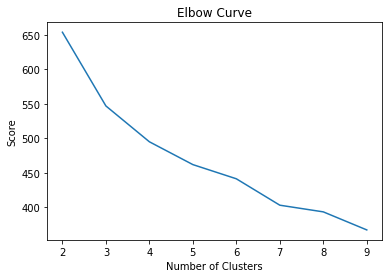

In [60]:
from pyspark.ml.clustering import KMeans

import numpy as np
import pandas as pd

cost = np.zeros(10)

for k in range(2,10):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol('featureVector')
    model = kmeans.fit(X)
    cost[k] = model.summary.trainingCost

# Plot the cost
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = [2,3,4,5,6,7,8, 9]
df_cost.insert(0, 'cluster', new_col)

import pylab as pl
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [61]:
# Ideal K size is K = 5
# Since the song list is huge, take K = 20
kmeans = KMeans().setK(20)

kmeans.setSeed(1).setFeaturesCol('featureVector')
model = kmeans.fit(X)
model.setPredictionCol("cluster")

transformed = model.transform(historical_songs_df)
transformed.select(["Title","Artist","cluster"]).show(truncate=False)

+-----------------------------------+--------------------------------------------+-------+
|Title                              |Artist                                      |cluster|
+-----------------------------------+--------------------------------------------+-------+
|loco contigo                       |DJ Snake - J Balvin - Tyga                  |0      |
|perfect                            |Logic                                       |10     |
|spirit - from disneys the lion king|BeyoncÃ©                                    |9      |
|amorfoda                           |Bad Bunny                                   |15     |
|whoa                               |XXXTENTACION                                |1      |
|who dat boy                        |Tyler, The Creator - A$AP Rocky             |2      |
|goosebumps                         |Travis Scott                                |10     |
|christmas time                     |Backstreet Boys                             |2      |

## Create a Method to pull song in the same cluster, displayed by highest popularity

In [62]:
def print_similar_songs(query,display=5):
    query = query.lower()
    found_cluster = None
    try:
        found_cluster = transformed.filter(transformed['Title']==query).select(["cluster"]).head(1)[0].__getitem__('cluster')
    except:
        print("Song do not exists in Database for Suggestion")
        return
    
    print(f"Found on Cluster {found_cluster}")
    related_song = transformed.filter(transformed['cluster']==found_cluster).select(["Title", "Popularity", "Uri"])
    related_song = related_song.withColumn("Title", initcap(col('Title'))).withColumn("Title", initcap(col('Title'))).withColumnRenamed("Uri", "Link")
    related_song = related_song.withColumn("Link", concat(lit("https://open.spotify.com/track/"),col('Link')))
    related_song = related_song.orderBy(desc("Popularity")).take(display)
    for song in related_song:
            print(f"{song['Title']} - Listen @ {song['Link']} - Popularity {song['Popularity']}")
    

## Enter the Song Name to get related Songs Suggestion

In [63]:
# Put a Track Name here to get Suggestion.
print_similar_songs("All of Me")

Found on Cluster 3
Lovely - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/0u2P5u6lvoDfwTYjAADbn4 - Popularity 79693.9
When The Partys Over - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/43zdsphuZLzwA9k4DJhU0I - Popularity 57236.95
When The Partys Over - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/14JzyD6FlBD5z0wV5P07YI - Popularity 26340.3
I Love You - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/6CcJMwBtXByIz4zQLzFkKc - Popularity 18010.15
Its Beginning To Look A Lot Like Christmas - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/0lLdorYw7lVrJydTINhWdI - Popularity 13829.1


## Related Song Suggestion for the Main Artist's Song which has been on the Top Charts

In [64]:
for artist,artist_id in main_artist_dict.items():
    top_tracks = top_tracks_main_artist.filter(top_tracks_main_artist["artist_id"]==artist_id)
    song_on_the_chart = top_tracks.join(spotify_top_charts_22_cleaned,top_tracks.id ==  spotify_top_charts_22_cleaned.uri,"inner")
    song_on_the_chart = song_on_the_chart.select(["track_name", "energy","artist_id", "artist_names", "weeks_on_chart"]).sort("weeks_on_chart")
    print(f"\nSong which has been in the maximum in the top charts is for - {artist} is : {song_on_the_chart.tail(1)[0].__getitem__('track_name')}")
    if song_on_the_chart.tail(1)[0].__getitem__('track_name'):
        print_similar_songs(song_on_the_chart.tail(1)[0].__getitem__('track_name'))


Song which has been in the maximum in the top charts is for - OneRepublic is : I Ain't Worried


Song do not exists in Database for Suggestion

Song which has been in the maximum in the top charts is for - Harry Styles is : Watermelon Sugar
Found on Cluster 16
Blinding Lights - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/0VjIjW4GlUZAMYd2vXMi3b - Popularity 57327.4
Watermelon Sugar - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/6UelLqGlWMcVH1E5c4H7lY - Popularity 53686.25
Thunder - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/0tKcYR2II1VCQWT79i5NrW - Popularity 40887.35
Nice For What - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/1cTZMwcBJT0Ka3UJPXOeeN - Popularity 34945.7
Nice For What - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/3CA9pLiwRIGtUBiMjbZmRw - Popularity 27828.8



Song which has been in the maximum in the top charts is for - The Weeknd is : Blinding Lights
Found on Cluster 16
Blinding Lights - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/0VjIjW4GlUZAMYd2vXMi3b - Popularity 57327.4
Watermelon Sugar - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/6UelLqGlWMcVH1E5c4H7lY - Popularity 53686.25
Thunder - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/0tKcYR2II1VCQWT79i5NrW - Popularity 40887.35
Nice For What - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/1cTZMwcBJT0Ka3UJPXOeeN - Popularity 34945.7
Nice For What - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/3CA9pLiwRIGtUBiMjbZmRw - Popularity 27828.8

Song which has been in the maximum in the top charts is for - John Legend is : All of Me


Found on Cluster 3
Lovely - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/0u2P5u6lvoDfwTYjAADbn4 - Popularity 79693.9
When The Partys Over - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/43zdsphuZLzwA9k4DJhU0I - Popularity 57236.95
When The Partys Over - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/14JzyD6FlBD5z0wV5P07YI - Popularity 26340.3
I Love You - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/6CcJMwBtXByIz4zQLzFkKc - Popularity 18010.15
Its Beginning To Look A Lot Like Christmas - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/0lLdorYw7lVrJydTINhWdI - Popularity 13829.1

Song which has been in the maximum in the top charts is for - Bad Bunny is : LA CANCIÓN
Song do not exists in Database for Suggestion


# Business Question V - Artist Feature Collaboration Network Using Graphframes

In [65]:
all_up_collaborations = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/artist_computed_collaboration.csv"))

artist_info = (spark.read
                  .option("header","true")
                  .option("inferSchema","true") 
                  .csv("spotify/artist_info.csv"))

In [66]:
from pyspark.sql.functions import col
from pyspark.sql.functions import count,avg,desc,asc,col

from graphframes import GraphFrame

# create vertices
# vertices = artist_info.withColumnRenamed("name","id")
vertices = artist_info.withColumnRenamed("artist_id","id")

# create edges dataframe with
edge = all_up_collaborations\
.withColumnRenamed("m_art_id", "src")\
.withColumnRenamed("f_art_id", "dst")\

# ceates the graph
g = GraphFrame(vertices, edge)

# graph processing requires recursive/iterative calculations so is a good practice to cache
g.cache()

## Take a look at the DataFrames
g.vertices.show()
g.edges.show()

## Check the number of edges of each vertex
g.degrees.show(truncate=False)

+--------------------+--------------------+---------+----------+--------------------+
|                  id|                name|followers|popularity|              genres|
+--------------------+--------------------+---------+----------+--------------------+
|48WvrUGoijadXXCsG...|           Byklubben|     1738|        24|['nordic house', ...|
|4lDiJcOJ2GLCK6p9q...|            Kontra K|  1999676|        72|['christlicher ra...|
|652XIvIBNGg3C0KIG...|               Maxim|    34596|        36|                  []|
|3dXC1YPbnQPsfHPVk...|  Christopher Martin|   249233|        52|['dancehall', 'lo...|
|74terC9ol9zMo8rfz...|       Jakob Hellman|    21193|        39|['classic swedish...|
|0FQMb3mVrAKlyU4H5...|                Madh|    26677|        19|                  []|
|71BhXa24Zf5zcikUb...|               Juice|    11312|        37|['swedish drill',...|
|3TG1RXLaEhHz5SIPM...|              Nehuda|    36252|        31|       ['francoton']|
|7MFvm8pwjLdmVBZdd...|         VovaZiLvova|    14619| 

+--------------------+------------------+--------------------+--------------------+---------------+----------------+--------------------+---------------+----------------+--------------------+------------------+
|                 src|        m_art_name|                 dst|          f_art_name|f_art_followers|f_art_popularity|           artist_id|m_art_followers|m_art_popularity|    collab_followers| collab_popularity|
+--------------------+------------------+--------------------+--------------------+---------------+----------------+--------------------+---------------+----------------+--------------------+------------------+
|76M2Ekj8bG8W7X2nb...|           NGHTMRE|7sfl4Xt5KmfyDs2T3...|             Lil Jon|        1332939|              73|76M2Ekj8bG8W7X2nb...|         432754|              63|            612791.0|              65.0|
|0hk4xVujcyOr6USD9...|         Sick Luke|7Do8se3ZoaVqUt3wo...|             MACHETE|         434637|              57|0hk4xVujcyOr6USD9...|         190977|   

+----------------------+------+
|id                    |degree|
+----------------------+------+
|6FXVn5ib6pVL8VZ9Z1L20x|2     |
|0jfo4K7lhf6pWZjQsVtcFF|17    |
|25wMXkplvEHJpJHX8A6Ved|26    |
|23BcnILXgG8UKUS4R48rCv|1     |
|5nLYd9ST4Cnwy6NHaCxbj8|82    |
|1YMrqJ1if4wmBE8CxnqLLt|54    |
|6MmRTVIPIe35OsFqWgRKQJ|32    |
|4xliXgK3ifxzOgSkmngR7v|2     |
|7a301tm0FXInlq1aOB8Gkd|2     |
|2sN4fSzAm2rAL0HIurPCEM|26    |
|4usBxmpmHRVy92QbcWk0M7|18    |
|4LKB1IkCINDDjEX8iS7glI|29    |
|0O6y1pr1YIKq65c6N3sI9c|21    |
|320TrJub4arztwXRm7kqVO|2     |
|5MO2kbaGGA2a8kL4c9qqHq|32    |
|0RTMam5YYSwu91eFhmHYV8|1     |
|5kUdDGYwca4e4Ijwsze0XO|1     |
|30QM66iEYigRKQfRNtnx7t|1     |
|0oW137oXCLwA5b4uYRxvIn|34    |
|5M9fdo6QZDwcUj08IvyLU0|1     |
+----------------------+------+
only showing top 20 rows



## Degree Centrality Analysis

We want to understand the importance of a node, in our case our main 5 artists based on the collaborations they have been in, either as a main performer ( man artist collaborated with other artists) or as a collaborator ( other artist collaborated with main artist)

In [67]:
total_degree = g.degrees
in_degree = g.inDegrees
out_degree = g.outDegrees


all_degrees = (total_degree.join(in_degree, "id", how="left")
.join(out_degree, "id", how="left")
.fillna(0)
.sort("degree", ascending=False))

all_degrees = all_degrees.withColumnRenamed("degree", "All Collaboration")\
    .withColumnRenamed("inDegree", f"Main Artist collborated W O Artist")\
    .withColumnRenamed("outDegree", f"O Artist collaborated W Main Artist")

# Save the Information
all_degrees.show()
all_degrees.toPandas().to_csv('collboration_degree.csv', index=False)

+--------------------+-----------------+----------------------------------+-----------------------------------+
|                  id|All Collaboration|Main Artist collborated W O Artist|O Artist collaborated W Main Artist|
+--------------------+-----------------+----------------------------------+-----------------------------------+
|5aIqB5nVVvmFsvSdE...|             1781|                              1321|                                460|
|1U5zgr455OGyIkLNX...|             1371|                               259|                               1112|
|0f1IECbrVV952unZk...|              858|                                89|                                769|
|4hV3aU0WKvFaiX5ug...|              633|                               384|                                249|
|7jzR5qj8vFnSu5JHa...|              580|                               557|                                 23|
|0SfsnGyD8FpIN4U4W...|              513|                                28|                             

## Show collaboration stats for main artist

In [68]:
for artist,artist_id in main_artist_dict.items():
    print(f"Collaboration for {artist}")
    selected_artist_degree = all_degrees.filter(all_degrees["id"]==artist_id)
    selected_artist_degree.show()

Collaboration for OneRepublic


+--------------------+-----------------+----------------------------------+-----------------------------------+
|                  id|All Collaboration|Main Artist collborated W O Artist|O Artist collaborated W Main Artist|
+--------------------+-----------------+----------------------------------+-----------------------------------+
|5Pwc4xIPtQLFEnJri...|               38|                                28|                                 10|
+--------------------+-----------------+----------------------------------+-----------------------------------+

Collaboration for Harry Styles


+---+-----------------+----------------------------------+-----------------------------------+
| id|All Collaboration|Main Artist collborated W O Artist|O Artist collaborated W Main Artist|
+---+-----------------+----------------------------------+-----------------------------------+
+---+-----------------+----------------------------------+-----------------------------------+

Collaboration for The Weeknd


+--------------------+-----------------+----------------------------------+-----------------------------------+
|                  id|All Collaboration|Main Artist collborated W O Artist|O Artist collaborated W Main Artist|
+--------------------+-----------------+----------------------------------+-----------------------------------+
|1Xyo4u8uXC1ZmMpat...|               71|                                15|                                 56|
+--------------------+-----------------+----------------------------------+-----------------------------------+

Collaboration for John Legend


+--------------------+-----------------+----------------------------------+-----------------------------------+
|                  id|All Collaboration|Main Artist collborated W O Artist|O Artist collaborated W Main Artist|
+--------------------+-----------------+----------------------------------+-----------------------------------+
|5y2Xq6xcjJb2jVM54...|              127|                                98|                                 29|
+--------------------+-----------------+----------------------------------+-----------------------------------+

Collaboration for Bad Bunny


+--------------------+-----------------+----------------------------------+-----------------------------------+
|                  id|All Collaboration|Main Artist collborated W O Artist|O Artist collaborated W Main Artist|
+--------------------+-----------------+----------------------------------+-----------------------------------+
|4q3ewBCX7sLwd24eu...|              128|                                92|                                 36|
+--------------------+-----------------+----------------------------------+-----------------------------------+



## Is main artist is part of the top 20 collaborators.

None of our main artist is actually part of the top collaborator list

In [69]:
# sorted by all all collaboration, take first 20 artist only.
print("Display Top 20 Collaboration")

top_20_degrees = all_degrees.limit(20)
top_20_degrees.show()

arist_id_list =  list(main_artist_dict.values())
selected_main_artist_degree = top_20_degrees.filter(top_20_degrees["id"].isin(artist_id))
selected_main_artist_degree.show()

Display Top 20 Collaboration


+--------------------+-----------------+----------------------------------+-----------------------------------+
|                  id|All Collaboration|Main Artist collborated W O Artist|O Artist collaborated W Main Artist|
+--------------------+-----------------+----------------------------------+-----------------------------------+
|5aIqB5nVVvmFsvSdE...|             1781|                              1321|                                460|
|1U5zgr455OGyIkLNX...|             1371|                               259|                               1112|
|0f1IECbrVV952unZk...|              858|                                89|                                769|
|4hV3aU0WKvFaiX5ug...|              633|                               384|                                249|
|7jzR5qj8vFnSu5JHa...|              580|                               557|                                 23|
|0SfsnGyD8FpIN4U4W...|              513|                                28|                             

+---+-----------------+----------------------------------+-----------------------------------+
| id|All Collaboration|Main Artist collborated W O Artist|O Artist collaborated W Main Artist|
+---+-----------------+----------------------------------+-----------------------------------+
+---+-----------------+----------------------------------+-----------------------------------+



## Triplets - GraphFrame
### Find If Main Artist has collaborated with Other Artist as - Lead Artist or Featuring Artist

Now we are going to develop a triplet filter in order to understand the extended network of collaborators of our main artists  n this case the src or dst will have any of our 5 top artists and the edge gives us the collaboration. Then we filter by src and dst and joined them, to find all collaboration as main artist or as featuring artist for our main 5 artist. With that we can understand which pairs have a strong history of 2 ways collaboration that have brought significantly benefits in terms of popularity ans an alternative to the recommeded artist we have found in our previous analysis

In [70]:
triplets = g.triplets
triplets.printSchema()

# filter triplets
for artist,artist_id in main_artist_dict.items():
    print(f"Collaboration for {artist}")
    
    main_artist_in_src = triplets.filter(triplets["src.id"]==artist_id)
    print(main_artist_in_src.count())
    main_artist_in_dst = triplets.filter(triplets["dst.id"]==artist_id)
    print(main_artist_in_dst.count())


    main_artist_in_src = main_artist_in_src.select(col("src.id").alias("main_artist_id"), col("src.name").alias("main_artist_name"), col("dst.id").alias("ft_artist"), col("dst.name").alias("ft_artist_name"), "edge.collab_followers","edge.collab_popularity")
    main_artist_in_dst = main_artist_in_dst.select(col("dst.id").alias("main_artist_id"),col("dst.name").alias("main_artist_name"), col("src.id").alias("ft_artist"), col("src.name").alias("ft_artist_name"), "edge.collab_followers","edge.collab_popularity")

    all_collaboration = main_artist_in_src.union(main_artist_in_dst)
    print(all_collaboration.count())
    
    
    # sort by popularity collaboration
    all_collaboration = all_collaboration.sort(all_collaboration.collab_popularity.desc())
    
    
    all_collaboration.select("main_artist_name","ft_artist_name","collab_followers","collab_popularity").show(5)
    #all_collaboration.toPandas().to_csv(f"graph/all_collaboration_{artist}.csv", index=False)

root
 |-- src: struct (nullable = false)
 |    |-- id: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- followers: string (nullable = true)
 |    |-- popularity: integer (nullable = true)
 |    |-- genres: string (nullable = true)
 |-- edge: struct (nullable = false)
 |    |-- src: string (nullable = true)
 |    |-- m_art_name: string (nullable = true)
 |    |-- dst: string (nullable = true)
 |    |-- f_art_name: string (nullable = true)
 |    |-- f_art_followers: string (nullable = true)
 |    |-- f_art_popularity: integer (nullable = true)
 |    |-- artist_id: string (nullable = true)
 |    |-- m_art_followers: string (nullable = true)
 |    |-- m_art_popularity: integer (nullable = true)
 |    |-- collab_followers: double (nullable = true)
 |    |-- collab_popularity: double (nullable = true)
 |-- dst: struct (nullable = false)
 |    |-- id: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- followers: string (nullable = true)
 |  

10


28


38


+----------------+---------------+--------------------+-----------------+
|main_artist_name| ft_artist_name|    collab_followers|collab_popularity|
+----------------+---------------+--------------------+-----------------+
|     OneRepublic|      Timbaland|         1.1787193E7|             82.2|
|     OneRepublic|          B.o.B|        1.17237268E7|81.60000000000001|
|     OneRepublic|Sebastian Yatra|1.8779785400000002E7|             81.6|
|     OneRepublic|           Seeb|        1.13844766E7|             80.8|
|     OneRepublic|           Kygo|           9338955.8|             80.8|
+----------------+---------------+--------------------+-----------------+
only showing top 5 rows

Collaboration for Harry Styles


0


0


0


+----------------+--------------+----------------+-----------------+
|main_artist_name|ft_artist_name|collab_followers|collab_popularity|
+----------------+--------------+----------------+-----------------+
+----------------+--------------+----------------+-----------------+

Collaboration for The Weeknd


56


15


71


+----------------+--------------+--------------------+-----------------+
|main_artist_name|ft_artist_name|    collab_followers|collab_popularity|
+----------------+--------------+--------------------+-----------------+
|      The Weeknd|         Drake|5.2880834400000006E7|             93.4|
|      The Weeknd|    Kanye West|        4.31443886E7|92.60000000000001|
|      The Weeknd|    Ed Sheeran|5.9941697800000004E7|             92.4|
|      The Weeknd|        Eminem|         5.1347254E7|             92.4|
|      The Weeknd|    Juice WRLD|4.4627215800000004E7|             92.2|
+----------------+--------------+--------------------+-----------------+
only showing top 5 rows

Collaboration for John Legend


29


98


127


+----------------+--------------+--------------------+-----------------+
|main_artist_name|ft_artist_name|    collab_followers|collab_popularity|
+----------------+--------------+--------------------+-----------------+
|     John Legend|    Kanye West|         1.5788317E7|             88.2|
|     John Legend|  David Guetta|2.1005902599999998E7|85.80000000000001|
|     John Legend|     Lil Wayne|        1.13223146E7|             83.4|
|     John Legend|     Sam Smith|        1.73328522E7|81.80000000000001|
|     John Legend|         JAY-Z|           7330261.0|81.80000000000001|
+----------------+--------------+--------------------+-----------------+
only showing top 5 rows

Collaboration for Bad Bunny


36
92


128


+----------------+--------------+--------------------+-----------------+
|main_artist_name|ft_artist_name|    collab_followers|collab_popularity|
+----------------+--------------+--------------------+-----------------+
|       Bad Bunny|      Dua Lipa|        5.17682672E7|             97.6|
|       Bad Bunny|       KAROL G|        5.02155192E7|             97.4|
|       Bad Bunny|      ROSALÃA|4.5723458800000004E7|             97.2|
|       Bad Bunny|   Myke Towers|        4.64329862E7|             97.0|
|       Bad Bunny|          Sech|        4.67698906E7|             96.6|
+----------------+--------------+--------------------+-----------------+
only showing top 5 rows



## PageRank

We are going to run a Personalized PageRank (PPR) for the Weeknd. PPR is an algorithm that calculates he importance of nodes in a graph from the perspective of a specific node. As we can see, excluding himself, according to PageRank the artist The Weeknd should be paired with are TY Dollar, Snoop Dog and Eminem ( in the first 3 positions)

In [ ]:
main_artist = "1Xyo4u8uXC1ZmMpatF05PJ"
pagerank_result = g.pageRank(resetProbability=0.15, maxIter=20, sourceId=main_artist)
pr=pagerank_result.vertices.sort("pagerank", ascending=False).show()

# Storing the results in MariaDB

In [ ]:
url = "jdbc:mysql://localhost:3306/GROUPA"
table = "MAIN_ARTIST"
mode = "overwrite"
props = {"user":"osbdet",
        "password":"osbdet123$", 
        "driver":"org.mariadb.jdbc.Driver"}

In [ ]:
main_artist_df.printSchema()

In [ ]:
main_artist_df.write.jdbc(url,table,mode,props)

In [ ]:
url = "jdbc:mysql://localhost:3306/GROUPA"
table = "TOP_TRACKS_MAIN_ARTIST"
mode = "overwrite"
props = {"user":"osbdet",
        "password":"osbdet123$", 
        "driver":"org.mariadb.jdbc.Driver"}

In [ ]:
top_tracks_main_artist.printSchema()

In [ ]:
url = "jdbc:mysql://localhost:3306/GROUPA"
table = "SPOTIFY_TOP_CHARTS_22"
mode = "overwrite"
props = {"user":"osbdet",
        "password":"osbdet123$", 
        "driver":"org.mariadb.jdbc.Driver"}

In [ ]:
spotify_top_charts_22.printSchema()

In [ ]:
url = "jdbc:mysql://localhost:3306/GROUPA"
table = "COLLBORATION_GROUPED"
mode = "overwrite"
props = {"user":"osbdet",
        "password":"osbdet123$", 
        "driver":"org.mariadb.jdbc.Driver"}

In [ ]:
mariadb_collboration_grouped_df = spotify_top_charts_22_main_artist_collaboration
mariadb_collboration_grouped_df.printSchema()

In [ ]:
url = "jdbc:mysql://localhost:3306/GROUPA"
table = "POPULAR_SCORE_RELATED_ARTIST"
mode = "overwrite"
props = {"user":"osbdet",
        "password":"osbdet123$", 
        "driver":"org.mariadb.jdbc.Driver"}

In [ ]:
sparkDF=spark.createDataFrame(popular_score_related_artist) 
mariadb_popular_score_related_artist = sparkDF
mariadb_popular_score_related_artist.printSchema()

In [ ]:
mariadb_popular_score_related_artist.write.jdbc(url,table,mode,props)

In [ ]:
url = "jdbc:mysql://localhost:3306/GROUPA"
table = "RELATED_ARTIST"
mode = "overwrite"
props = {"user":"osbdet",
        "password":"osbdet123$", 
        "driver":"org.mariadb.jdbc.Driver"}

In [ ]:
mariadb_related_artist_main_artist = related_artist_main_artist
mariadb_related_artist_main_artist.printSchema()

In [ ]:
mariadb_related_artist_main_artist.write.jdbc(url,table,mode,props)

In [ ]:
mariadb_consolidated_tweet_df = consolidated_tweet_df
mariadb_consolidated_tweet_df.printSchema()url = "jdbc:mysql://localhost:3306/GROUPA"
table = "TABLEA"
mode = "overwrite"
props = {"user":"osbdet",
        "password":"osbdet123$", 
        "driver":"org.mariadb.jdbc.Driver"}

In [ ]:
mariadb_tablea = spotify_top_charts_22_main_artist_.groupBy("main_artist")\
    .agg(count("*").alias("Total Song on Top Chart"), avg("weeks_on_chart").alias("Average Week on Top Charts"))\
.withColumnRenamed("main_artist","Artist")

In [ ]:
mariadb_tablea.write.jdbc(url,table,mode,props)

In [ ]:
url = "jdbc:mysql://localhost:3306/GROUPA"
table = "MAIN_ARTIST_TWEET"
mode = "overwrite"
props = {"user":"osbdet",
        "password":"osbdet123$", 
        "driver":"org.mariadb.jdbc.Driver"}

In [ ]:
sparkDF1=spark.createDataFrame(main_artist_tweet_count_df) 
mariadb_popular_score_related_artist = sparkDF1
mariadb_popular_score_related_artist.printSchema()

In [ ]:
mariadb_popular_score_related_artist.write.jdbc(url,table,mode,props)

In [ ]:
url = "jdbc:mysql://localhost:3306/GROUPA"
table = "PAGERANK_TWEET"
mode = "overwrite"
props = {"user":"osbdet",
        "password":"osbdet123$", 
        "driver":"org.mariadb.jdbc.Driver"}

In [72]:
mariadb_pagerank=pr
mariadb_pagerank.printSchema()

NameError: name 'pr' is not defined

In [ ]:
mariadb_pagerank.write.jdbc(url,table,mode,props)

# Business Questions - VI - Historical song information last 20 year


### A. What are the genre with highest popularity in the last 20 years?
### B. What are the artist with the most songs in the last 20 years?
### C How did the length of a song change over the last 20 years? 
### D. How did the number of songs relate to the popularity
### E. Based on music feeatures what clusters can we find? 
### F. Can we find a model to predict popularity of a song based on music attributes? 

### Preparation

In [72]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [73]:
import findspark
findspark.init()

In [92]:
import findspark
findspark.init()
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col, split

In [75]:
from pyspark.sql.session import SparkSession

spark = (SparkSession.builder
    .appName("Spotify_last_20_years")
    .getOrCreate())

In [76]:
df_20 = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("hits_last_20_years.csv")            
            .distinct())

In [77]:
df_20.head()

Row(artist='Vengaboys', song='Shalala Lala', duration_ms=214819, explicit=False, year=2000, popularity=58, danceability=0.751, energy=0.901, key=2, loudness=-5.802, mode=1, speechiness=0.0328, acousticness=0.0504, instrumentalness=0.00308, liveness=0.0395, valence=0.973, tempo=124.017, genre='pop')

In [78]:
df_20.columns

['artist',
 'song',
 'duration_ms',
 'explicit',
 'year',
 'popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'genre']

In [79]:
df_20.printSchema()

root
 |-- artist: string (nullable = true)
 |-- song: string (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- year: integer (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- genre: string (nullable = true)



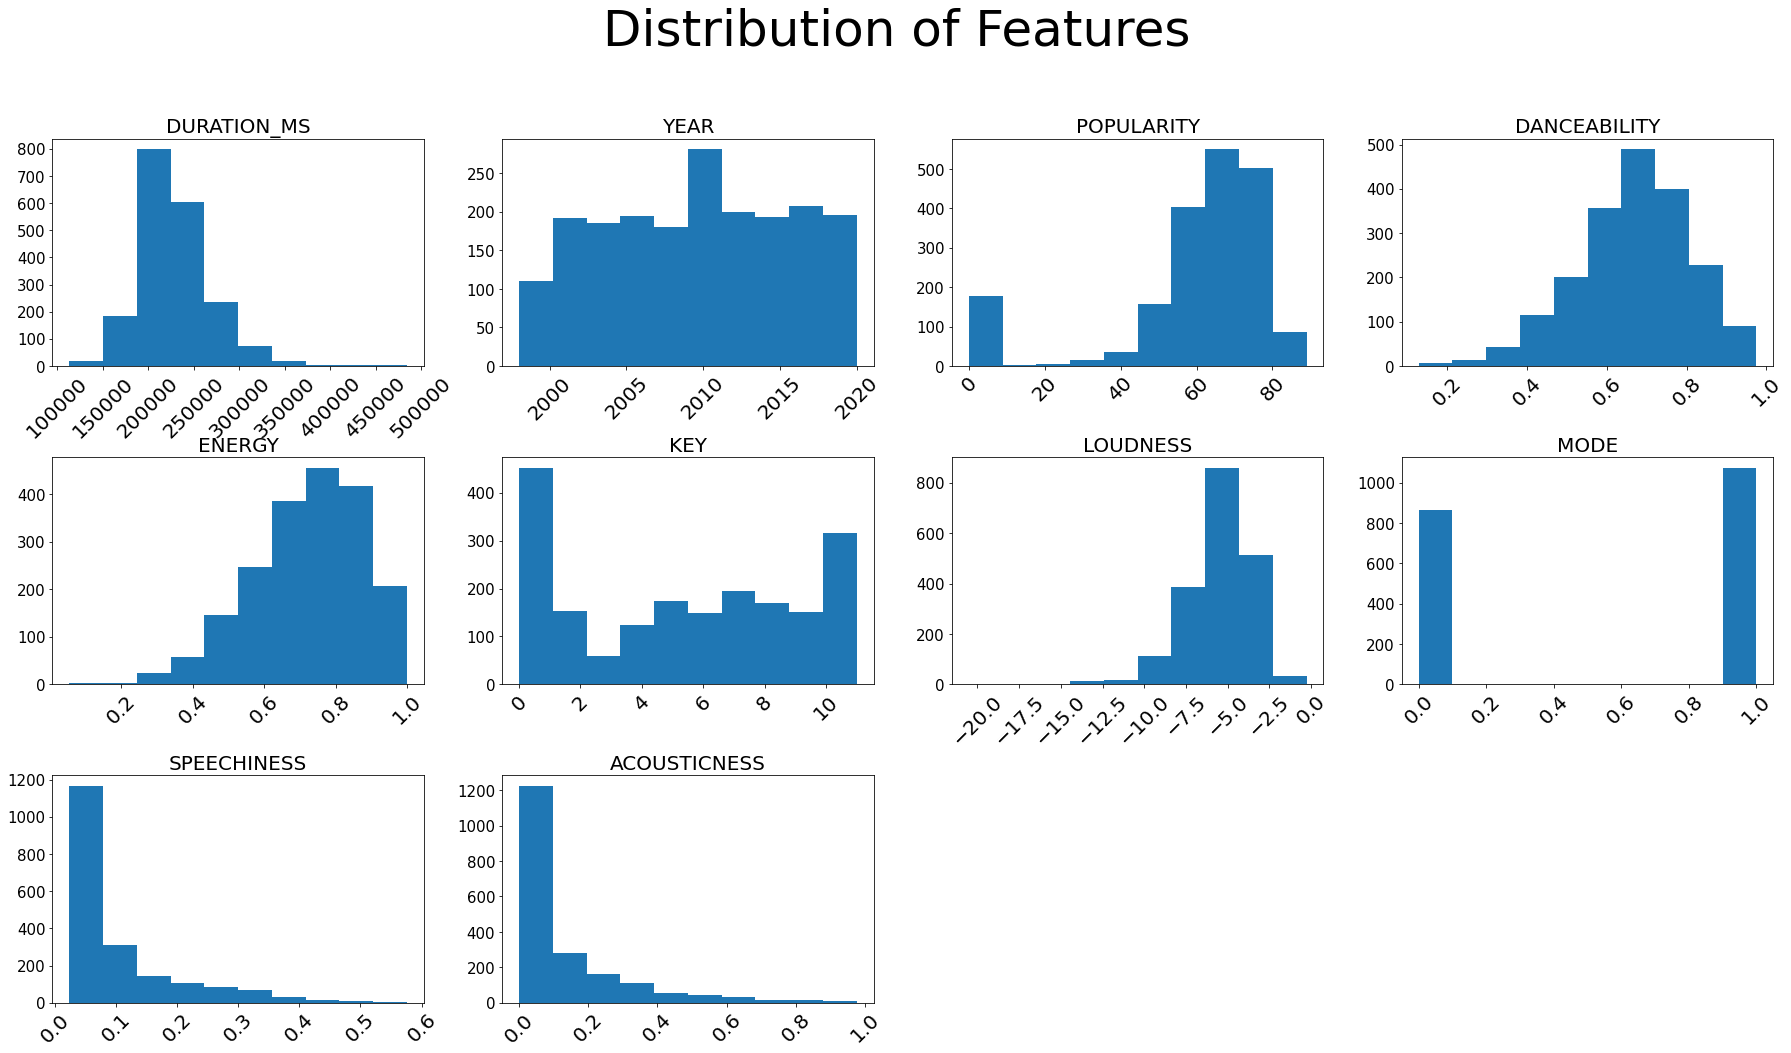

In [80]:
fig = plt.figure(figsize=(25,15))
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")
for col, num in zip(df_20.toPandas().describe().columns,range(1,11)):
    ax = fig.add_subplot(3,4, num)
    ax.hist(df_20.toPandas()[col])
    plt.grid(False)
    plt.xticks(rotation=45, fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(col.upper(), fontsize=20)
    
    
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

In [81]:
catCols = [x for (x, dataType) in df_20.dtypes if (dataType == "string") or (x=="explicit") or (x=="mode")]
numCols = [x for (x, dataType) in df_20.dtypes if (dataType =="double" or "integer") and (x!= "song") and (x!= "artist") and (x!= "genre") and (x!= "explicit")]

In [93]:
df_20 = df_20.withColumn("duration_min", col("duration_ms")/100000)

In [82]:
numeric_features_df = df_20.select(numCols)
numeric_features_df.toPandas().head()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,214819,2000,58,0.751,0.901,2,-5.802,1,0.0328,0.0504,0.003080,0.0395,0.973,124.017
1,221133,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.3620,0.000004,0.1690,0.927,97.954
2,216706,2004,70,0.751,0.731,6,-4.419,0,0.0308,0.0838,0.000000,0.0556,0.973,97.007
3,202133,2006,72,0.348,0.875,11,-4.758,0,0.1990,0.0341,0.000000,0.1170,0.407,169.152
4,172053,2010,61,0.752,0.836,10,-3.173,1,0.1150,0.0843,0.000425,0.4240,0.519,120.003


In [83]:
from pyspark.mllib.stat import Statistics
import pandas as pd

In [84]:
col_names = numeric_features_df.columns
features = numeric_features_df.rdd.map(lambda row: row[0:])

corr_mat = Statistics.corr(features,method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index = col_names
corr_df.columns = col_names
round(corr_df,2)

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.00,-0.32,0.05,-0.06,-0.08,-0.00,-0.09,-0.00,0.06,0.01,-0.01,0.02,-0.12,-0.03
year,-0.32,1.00,-0.01,0.04,-0.11,0.01,0.02,-0.01,0.00,0.04,-0.05,-0.03,-0.21,0.08
popularity,0.05,-0.01,1.00,-0.00,-0.01,0.01,0.03,-0.02,0.02,0.02,-0.05,-0.01,-0.01,0.01
danceability,-0.06,0.04,-0.00,1.00,-0.10,0.04,-0.04,-0.07,0.14,-0.06,0.02,-0.13,0.40,-0.17
energy,-0.08,-0.11,-0.01,-0.10,1.00,-0.00,0.65,-0.04,-0.06,-0.45,0.04,0.15,0.33,0.15
key,-0.00,0.01,0.01,0.04,-0.00,1.00,-0.01,-0.15,0.00,0.00,-0.00,-0.04,0.04,-0.01
loudness,-0.09,0.02,0.03,-0.04,0.65,-0.01,1.00,-0.03,-0.08,-0.31,-0.10,0.10,0.23,0.08
mode,-0.00,-0.01,-0.02,-0.07,-0.04,-0.15,-0.03,1.00,0.00,0.01,-0.04,0.03,-0.08,0.05
speechiness,0.06,0.00,0.02,0.14,-0.06,0.00,-0.08,0.00,1.00,0.00,-0.06,0.06,0.07,0.06
acousticness,0.01,0.04,0.02,-0.06,-0.45,0.00,-0.31,0.01,0.00,1.00,-0.00,-0.11,-0.13,-0.11


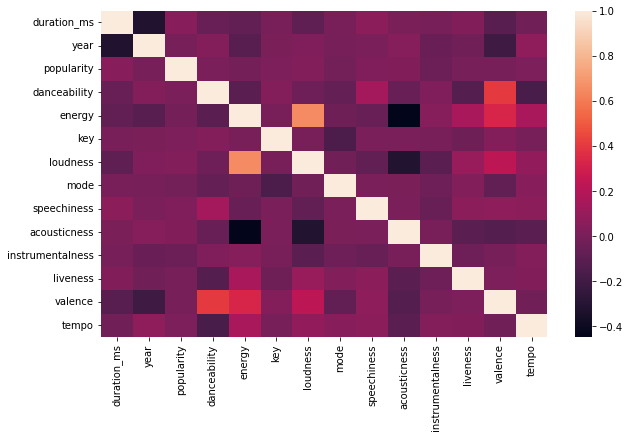

In [85]:
sns.heatmap(corr_df);

### A. What are the genre with highest popularity in the last 20 years?

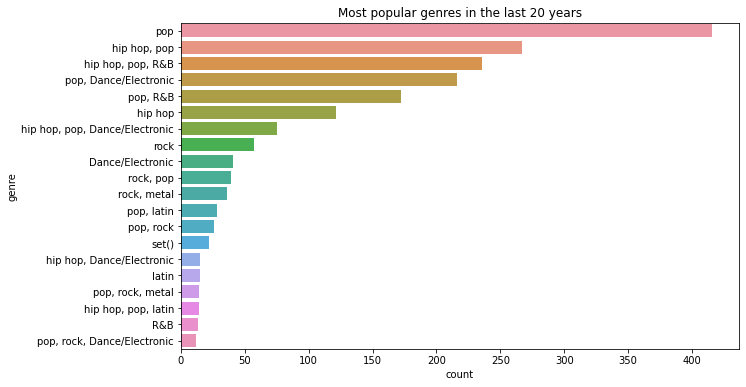

In [86]:

result_df = (df_20.groupBy("genre")
               .count()
               .orderBy("count", ascending=False)
               .limit(20)
               .toPandas()
            )


sns.barplot(data=result_df, y='genre', x='count').set_title('Most popular genres in the last 20 years');

However we see here that some genres are overlapping

In [37]:
genreexp = df_20.withColumn("genre", split(df_20.genre, ', ')).toPandas().explode('genre').reset_index(drop=True)  
genreexp

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Vengaboys,Shalala Lala,214819,False,2000,58,0.751,0.901,2,-5.802,1,0.0328,0.0504,0.003080,0.0395,0.9730,124.017,pop
1,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.3620,0.000004,0.1690,0.9270,97.954,pop
2,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.3620,0.000004,0.1690,0.9270,97.954,R&B
3,Juanes,La Camisa Negra,216706,False,2004,70,0.751,0.731,6,-4.419,0,0.0308,0.0838,0.000000,0.0556,0.9730,97.007,pop
4,Juanes,La Camisa Negra,216706,False,2004,70,0.751,0.731,6,-4.419,0,0.0308,0.0838,0.000000,0.0556,0.9730,97.007,latin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,Lil Wayne,Lollipop,299333,True,2008,69,0.829,0.428,0,-9.469,1,0.0831,0.0560,0.004130,0.1370,0.4500,148.075,pop
3584,Otto Knows,Million Voices - Radio Edit,192866,False,2012,0,0.582,0.894,8,-6.298,1,0.0410,0.0022,0.022300,0.0664,0.0694,125.946,pop
3585,Otto Knows,Million Voices - Radio Edit,192866,False,2012,0,0.582,0.894,8,-6.298,1,0.0410,0.0022,0.022300,0.0664,0.0694,125.946,Dance/Electronic
3586,Fall Out Boy,My Songs Know What You Did In The Dark (Light Em Up),186826,False,2013,71,0.558,0.924,9,-4.341,0,0.0640,0.0271,0.000003,0.5370,0.5670,151.990,rock


In [65]:
songsbyartist_df = df_20.groupBy('artist').count()
popularity_byartist_df = df_20.groupBy('artist').mean().select('artist','avg(popularity)')
songspopbyartist_df = songsbyartist_df.join(popularity_byartist_df,'artist','inner')

In [66]:
popularity_byartist_df

DataFrame[artist: string, avg(popularity): double]

In [67]:
songspopbyartist_df

DataFrame[artist: string, count: bigint, avg(popularity): double]

In [41]:
genreexp.genre.unique()

array(['pop', 'R&B', 'latin', 'rock', 'Dance/Electronic', 'metal',
       'set()', 'hip hop', 'Folk/Acoustic', 'easy listening', 'jazz',
       'World/Traditional', 'country', 'blues', 'classical'], dtype=object)

In [42]:

genreexp.drop(genreexp[genreexp.genre.isin(['set()'])].index,inplace=True)


avgbygenre = genreexp.groupby('genre').mean().reset_index()
avgbygenre.drop(['year'],axis=1,inplace=True)
avgbygenre

/tmp/ipykernel_898/3557836812.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgbygenre = genreexp.groupby('genre').mean().reset_index()


,genre,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Dance/Electronic,216043.823684,0.115789,54.610526,0.667637,0.768458,5.731579,-5.143868,0.507895,0.078725,0.107887,0.038381,0.184883,0.538031,124.020800
1,Folk/Acoustic,220183.650000,0.050000,60.200000,0.567400,0.728550,4.600000,-6.353800,0.750000,0.042185,0.197199,0.043269,0.188910,0.579250,110.348050
2,R&B,239582.967963,0.283753,58.569794,0.689686,0.662096,5.322654,-5.933579,0.519451,0.114744,0.151053,0.006649,0.163768,0.564274,115.705721
3,World/Traditional,219063.800000,0.100000,53.800000,0.603000,0.685700,3.900000,-6.187800,0.600000,0.079530,0.272961,0.198378,0.194410,0.653700,110.333200
4,blues,244643.250000,0.000000,45.500000,0.649750,0.669750,4.250000,-5.616500,0.500000,0.091900,0.021053,0.112260,0.171200,0.495500,122.932250
5,classical,219560.000000,0.000000,63.000000,0.590000,0.578000,10.000000,-5.798000,0.000000,0.052800,0.612000,0.000162,0.083700,0.264000,81.663000
6,country,222198.700000,0.050000,56.200000,0.576750,0.729650,5.950000,-5.517100,0.800000,0.060755,0.213051,0.000014,0.180740,0.529550,130.541800
7,easy listening,234931.000000,0.000000,61.428571,0.612000,0.689714,6.857143,-7.598714,0.428571,0.051457,0.240632,0.038343,0.135486,0.570286,121.425714
8,hip hop,233989.757656,0.552597,61.834887,0.718383,0.699891,5.593875,-5.611569,0.541944,0.151975,0.116415,0.006162,0.188884,0.562186,118.056161
9,jazz,224813.000000,0.000000,57.500000,0.548000,0.233000,2.000000,-14.418000,1.000000,0.031700,0.686000,0.004443,0.109950,0.225000,104.999500


Text(0.5, 0, 'Average popularity')

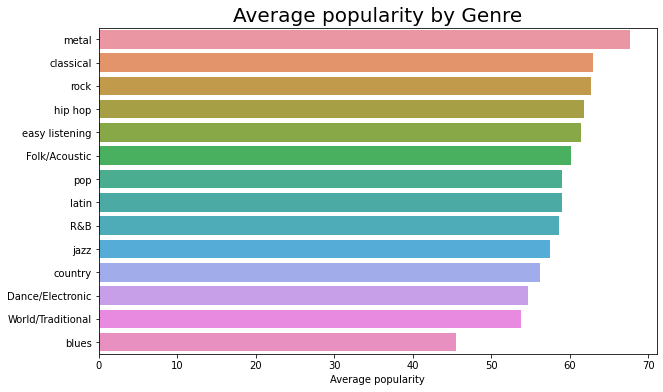

In [43]:
# Popularity by genre
plt.rcParams["figure.figsize"] = (10,6)
ax = sns.barplot(x="popularity", y="genre",
                  data=avgbygenre.sort_values("popularity", ascending=False))
ax.set_title("Average popularity by specific Genre", fontsize=20)
ax.set_ylabel("")
ax.set_xlabel("Average popularity")

### B. What are the artist with the most songs in the last 20 years?

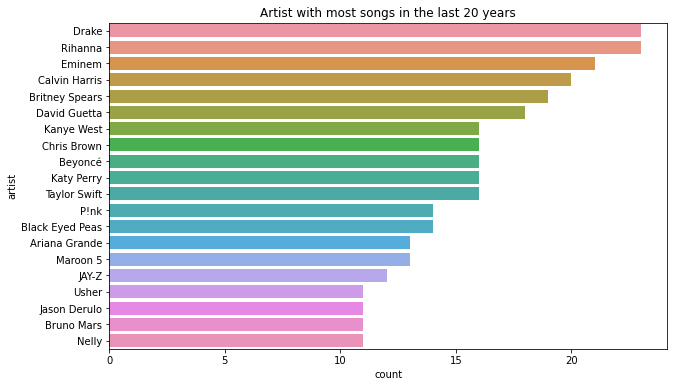

In [71]:
# each count is a song that was in the top 200 most played on a day on spotify during the last 3 years
result_df = (df_20.groupBy("artist")
               .count()
               .orderBy("count", ascending=False)
               .limit(20)
               .toPandas()
            )


sns.barplot(data=result_df, y='artist', x='count').set_title('Artist with most songs in the last 20 years');

### C How did the length of a song change over the last 20 years?

In [98]:
df_20.orderBy(col("duration_min").desc()).select('artist','song','duration_min','year').show(10)

+--------------------+--------------------+------------+----+
|              artist|                song|duration_min|year|
+--------------------+--------------------+------------+----+
|   Justin Timberlake|             Mirrors|     4.84146|2013|
|       Roger Sanchez|      Another Chance|     4.52906|2000|
|   Justin Timberlake|What Goes Around....|     4.48573|2006|
|   Justin Timberlake|LoveStoned / I Th...|     4.44333|2006|
|         Dirty Vegas|          Days Go By|     4.32146|2002|
|          Nio Garcia|     Te Boté - Remix|      4.1792|2018|
|              Eminem|                Stan|     4.04106|2000|
|The Chemical Brot...|           Galvanize|     3.93813|2005|
|         Alicia Keys|You Don't Know My...|     3.66733|2003|
|            Lil' Kim|         Magic Stick|     3.59973|2019|
+--------------------+--------------------+------------+----+
only showing top 10 rows



In [97]:
df_20.orderBy(col("duration_min").asc()).select('artist','song','duration_min','year').show(10)

+------------+--------------+------------+----+
|      artist|          song|duration_min|year|
+------------+--------------+------------+----+
|   Lil Nas X| Old Town Road|        1.13|2019|
|   Lil Nas X|        Panini|     1.14893|2019|
|XXXTENTACION|Jocelyn Flores|     1.19133|2017|
|XXXTENTACION|       changes|     1.21886|2018|
|    Lil Pump|    Gucci Gang|     1.24055|2017|
|    Saweetie|       My Type|     1.26446|2019|
|      The xx|         Intro|      1.2792|2009|
|    Blueface|      Thotiana|     1.29264|2018|
|       Bazzi|          Mine|     1.31064|2018|
|   iann dior|      emotions|     1.31213|2019|
+------------+--------------+------------+----+
only showing top 10 rows



+----+-----+
|year|count|
+----+-----+
|1998|    1|
|1999|   38|
|2000|   71|
|2001|  106|
|2002|   86|
|2003|   91|
|2004|   95|
|2005|  101|
|2006|   93|
|2007|   90|
|2008|   91|
|2009|   82|
|2010|  103|
|2011|   96|
|2012|  113|
|2013|   87|
|2014|  100|
|2015|   93|
|2016|   98|
|2017|  110|
|2018|  104|
|2019|   89|
|2020|    3|
+----+-----+



<AxesSubplot:xlabel='year'>

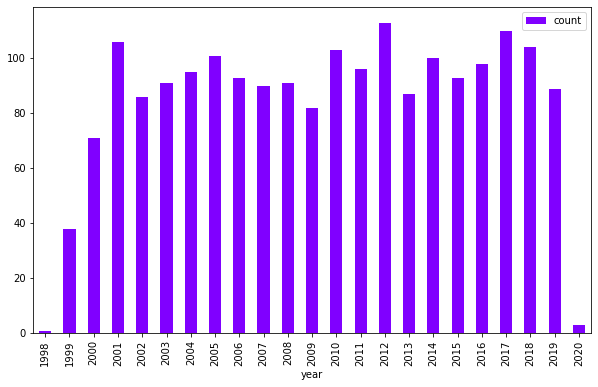

In [99]:
#songs per year
df_by_year = df_20.groupBy(col('year')).count().orderBy('year')
df_by_year.show(30)
df_by_year.toPandas().plot.bar(x='year',cmap='rainbow',figsize=(10,6))

In [101]:
songsbyartist_df = df_20.groupBy(col('artist')).count()
popbyartist_df = df_20.groupBy(col('artist')).mean().select('artist','avg(popularity)')
songspopbyartist_df = songsbyartist_df.join(popbyartist_df,'artist','inner')

In [ ]:
#Popularity based on numer of songs
plt.rcParams["figure.figsize"] = (10,6)
ax = sns.regplot(y="avg(popularity)", x="count", data=songspopbyartist_df.toPandas(),scatter_kws={"color": "green"}, line_kws={"color": "darkgreen"}, x_jitter=0.1)
ax.set_title("Popularity of artist based on number of songs", fontsize=15)
ax.set_xlabel("Number of songs")
ax.set_xticks(np.arange(1, 26, 1))
ax.set_ylabel("Average Popularity")
ax.set_yticks(np.arange(0, 100, 10))

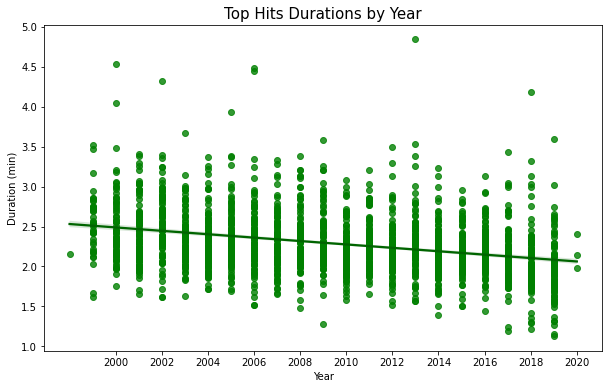

In [103]:
#Top hits duration by year

plt.rcParams["figure.figsize"] = (10,6)
ax = sns.regplot(x="year", y="duration_min", scatter_kws={"color": "green"}, line_kws={"color": "darkgreen"}, data=df_20.toPandas())
ax.set_title("Top Hits Durations by Year", fontsize=15)
ax.set_ylabel("Duration (min)")
ax.set_xlabel("Year")
ax.set_xticks(np.arange(2000, 2021, 2))

### D. How did the number of songs relate to the popularity

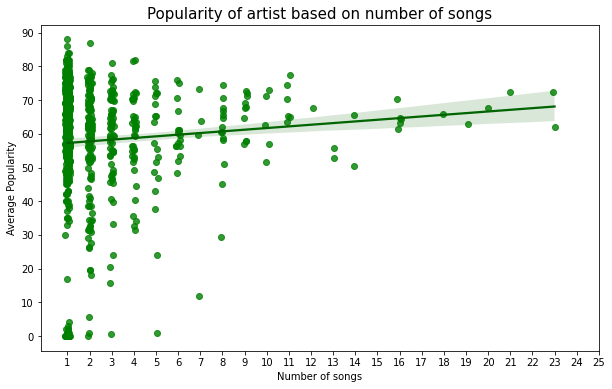

In [104]:
#Regression plot popularity vs songs
plt.rcParams["figure.figsize"] = (10,6)
ax = sns.regplot(y="avg(popularity)", x="count", data=songspopbyartist_df.toPandas(),scatter_kws={"color": "green"}, line_kws={"color": "darkgreen"}, x_jitter=0.1)
ax.set_title("Popularity of artist based on number of songs", fontsize=15)
ax.set_xlabel("Number of songs")
ax.set_xticks(np.arange(1, 26, 1))
ax.set_ylabel("Average Popularity")
ax.set_yticks(np.arange(0, 100, 10))

### E. Based on music feeatures what clusters can we find? 

In [106]:
from pyspark.ml.feature import VectorAssembler

vector_col = "vector_features"

assembler = VectorAssembler(inputCols=['acousticness',
 'danceability',
 'duration_min',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence'], outputCol=vector_col)

In [107]:
df_cleaned_vectorized = assembler.transform(df_20)
df_cleaned_vectorized .limit(5).toPandas()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min,vector_features
0,Vengaboys,Shalala Lala,214819,False,2000,58,0.751,0.901,2,-5.802,1,0.0328,0.0504,0.003080,0.0395,0.973,124.017,pop,2.14819,"[0.0504, 0.751, 2.14819, 0.901, 0.00308, 2.0, 0.0395, -5.802, 1.0, 0.0328, 124.017, 0.973]"
1,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.3620,0.000004,0.1690,0.927,97.954,"pop, R&B",2.21133,"[0.362, 0.73, 2.21133, 0.602, 3.69e-06, 6.0, 0.169, -3.782, 0.0, 0.206, 97.954, 0.927]"
2,Juanes,La Camisa Negra,216706,False,2004,70,0.751,0.731,6,-4.419,0,0.0308,0.0838,0.000000,0.0556,0.973,97.007,"pop, latin",2.16706,"[0.0838, 0.751, 2.16706, 0.731, 0.0, 6.0, 0.0556, -4.419, 0.0, 0.0308, 97.007, 0.973]"
3,Arctic Monkeys,When The Sun Goes Down,202133,True,2006,72,0.348,0.875,11,-4.758,0,0.1990,0.0341,0.000000,0.1170,0.407,169.152,rock,2.02133,"[0.0341, 0.348, 2.02133, 0.875, 0.0, 11.0, 0.117, -4.758, 0.0, 0.199, 169.152, 0.407]"
4,Kesha,Blah Blah Blah (feat. 3OH!3),172053,True,2010,61,0.752,0.836,10,-3.173,1,0.1150,0.0843,0.000425,0.4240,0.519,120.003,"pop, Dance/Electronic",1.72053,"[0.0843, 0.752, 1.72053, 0.836, 0.000425, 10.0, 0.424, -3.173, 1.0, 0.115, 120.003, 0.519]"


In [109]:
from pyspark.ml.feature import StandardScaler

standard_scaler = StandardScaler(inputCol="vector_features",outputCol="scaled")

In [112]:
df_cleaned_vectorized_scaled = standard_scaler.fit(df_cleaned_vectorized).transform(df_cleaned_vectorized)

In [113]:
df_cleaned_vectorized_scaled.limit(5).toPandas()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min,vector_features,scaled
0,Vengaboys,Shalala Lala,214819,False,2000,58,0.751,0.901,2,-5.802,...,0.0328,0.0504,0.003080,0.0395,0.973,124.017,pop,2.14819,"[0.0504, 0.751, 2.14819, 0.901, 0.00308, 2.0, 0.0395, -5.802, 1.0, 0.0328, 124.017, 0.973]","[0.2920320082540092, 5.34107960153238, 5.473123973372834, 5.893834394768591, 0.03485291662037377, 0.5532090438536779, 0.2803216866998713, -2.99234050870902, 2.0109531058326473, 0.3411413165997008, 4.594843259483186, 4.405797356715408]"
1,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,...,0.2060,0.3620,0.000004,0.1690,0.927,97.954,"pop, R&B",2.21133,"[0.362, 0.73, 2.21133, 0.602, 3.69e-06, 6.0, 0.169, -3.782, 0.0, 0.206, 97.954, 0.927]","[2.097531487856177, 5.191728507481542, 5.633991051088846, 3.9379448453392802, 4.175560465233091e-05, 1.6596271315610336, 1.199351013981728, -1.9505397800650663, 0.0, 2.1425338786444623, 3.6292062913908256, 4.197506834198544]"
2,Juanes,La Camisa Negra,216706,False,2004,70,0.751,0.731,6,-4.419,...,0.0308,0.0838,0.000000,0.0556,0.973,97.007,"pop, latin",2.16706,"[0.0838, 0.751, 2.16706, 0.731, 0.0, 6.0, 0.0556, -4.419, 0.0, 0.0308, 97.007, 0.973]","[0.48556115658107085, 5.34107960153238, 5.52120065624425, 4.781790169340555, 0.0, 1.6596271315610336, 0.3945793868484264, -2.279068029642392, 0.0, 0.3203400168070361, 3.5941198389953435, 4.405797356715408]"
3,Arctic Monkeys,When The Sun Goes Down,202133,True,2006,72,0.348,0.875,11,-4.758,...,0.1990,0.0341,0.000000,0.1170,0.407,169.152,rock,2.02133,"[0.0341, 0.348, 2.02133, 0.875, 0.0, 11.0, 0.117, -4.758, 0.0, 0.199, 169.152, 0.407]","[0.19758514844170064, 2.4749609871281866, 5.1499121032579565, 5.723757042644303, 0.0, 3.0426497411952282, 0.8303199327565809, -2.4539048845979865, 0.0, 2.069729329370136, 6.267099889757855, 1.842918318790515]"
4,Kesha,Blah Blah Blah (feat. 3OH!3),172053,True,2010,61,0.752,0.836,10,-3.173,...,0.1150,0.0843,0.000425,0.4240,0.519,120.003,"pop, Dance/Electronic",1.72053,"[0.0843, 0.752, 1.72053, 0.836, 0.000425, 10.0, 0.424, -3.173, 1.0, 0.115, 120.003, 0.519]","[0.48845829952009867, 5.348191558391944, 4.383538695323581, 5.468641014457871, 0.004809249858330796, 2.7660452192683893, 3.009022662297353, -1.6364523326669633, 2.0109531058326473, 1.1960747380782193, 4.446124125464741, 2.350060460570706]"


In [219]:
classification_data = df_cleaned_vectorized_PCA.select(["pca_features","vector_features","popularity","scaled"])

In [220]:
(train_df, test_df) = classification_data.randomSplit([0.8,0.2],seed=14)

In [221]:
print(f"Train set length: {train_df.count()} records")
print(f"Test set length: {test_df.count()} records")

Train set length: 1537 records


Test set length: 404 records


In [211]:
train_df.show(5)

+--------------------+----------+
|        pca_features|popularity|
+--------------------+----------+
|[-6.3689174504165...|        71|
|[-6.0649226748664...|        65|
|[-4.8814456784076...|        69|
|[-4.6370972176480...|        67|
|[-4.1327991651919...|        60|
+--------------------+----------+
only showing top 5 rows



#### Principal Component Analysis

In [153]:
from pyspark.ml.feature import PCA
pca = PCA(k=2, inputCol="scaled", outputCol="pca_features")
df_cleaned_vectorized_PCA = pca.fit(df_cleaned_vectorized_scaled).transform(df_cleaned_vectorized_scaled)
df_cleaned_vectorized_PCA.limit(5).toPandas()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min,vector_features,scaled,pca_features
0,Vengaboys,Shalala Lala,214819,False,2000,58,0.751,0.901,2,-5.802,...,0.0504,0.003080,0.0395,0.973,124.017,pop,2.14819,"[0.0504, 0.751, 2.14819, 0.901, 0.00308, 2.0, 0.0395, -5.802, 1.0, 0.0328, 124.017, 0.973]","[0.2920320082540092, 5.34107960153238, 5.473123973372834, 5.893834394768591, 0.03485291662037377, 0.5532090438536779, 0.2803216866998713, -2.99234050870902, 2.0109531058326473, 0.3411413165997008, 4.594843259483186, 4.405797356715408]","[3.3667273964590843, 2.9850257454901676]"
1,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,...,0.3620,0.000004,0.1690,0.927,97.954,"pop, R&B",2.21133,"[0.362, 0.73, 2.21133, 0.602, 3.69e-06, 6.0, 0.169, -3.782, 0.0, 0.206, 97.954, 0.927]","[2.097531487856177, 5.191728507481542, 5.633991051088846, 3.9379448453392802, 4.175560465233091e-05, 1.6596271315610336, 1.199351013981728, -1.9505397800650663, 0.0, 2.1425338786444623, 3.6292062913908256, 4.197506834198544]","[1.968284014865617, 4.06987363366867]"
2,Juanes,La Camisa Negra,216706,False,2004,70,0.751,0.731,6,-4.419,...,0.0838,0.000000,0.0556,0.973,97.007,"pop, latin",2.16706,"[0.0838, 0.751, 2.16706, 0.731, 0.0, 6.0, 0.0556, -4.419, 0.0, 0.0308, 97.007, 0.973]","[0.48556115658107085, 5.34107960153238, 5.52120065624425, 4.781790169340555, 0.0, 1.6596271315610336, 0.3945793868484264, -2.279068029642392, 0.0, 0.3203400168070361, 3.5941198389953435, 4.405797356715408]","[2.9971878855274805, 3.9869433722408814]"
3,Arctic Monkeys,When The Sun Goes Down,202133,True,2006,72,0.348,0.875,11,-4.758,...,0.0341,0.000000,0.1170,0.407,169.152,rock,2.02133,"[0.0341, 0.348, 2.02133, 0.875, 0.0, 11.0, 0.117, -4.758, 0.0, 0.199, 169.152, 0.407]","[0.19758514844170064, 2.4749609871281866, 5.1499121032579565, 5.723757042644303, 0.0, 3.0426497411952282, 0.8303199327565809, -2.4539048845979865, 0.0, 2.069729329370136, 6.267099889757855, 1.842918318790515]","[3.055065395010965, 0.4219094375430757]"
4,Kesha,Blah Blah Blah (feat. 3OH!3),172053,True,2010,61,0.752,0.836,10,-3.173,...,0.0843,0.000425,0.4240,0.519,120.003,"pop, Dance/Electronic",1.72053,"[0.0843, 0.752, 1.72053, 0.836, 0.000425, 10.0, 0.424, -3.173, 1.0, 0.115, 120.003, 0.519]","[0.48845829952009867, 5.348191558391944, 4.383538695323581, 5.468641014457871, 0.004809249858330796, 2.7660452192683893, 3.009022662297353, -1.6364523326669633, 2.0109531058326473, 1.1960747380782193, 4.446124125464741, 2.350060460570706]","[3.600134378670853, 1.9852191003072925]"


In [154]:
#working with differnent k in range from 1 to 9 

from pyspark.ml.clustering import KMeans



kmeans2 = KMeans(k=2, seed=221, maxIter=20, featuresCol="pca_features")
kmeans3 = KMeans(k=3, seed=221, maxIter=20, featuresCol="pca_features")
kmeans4 = KMeans(k=4, seed=221, maxIter=20, featuresCol="pca_features")
kmeans5 = KMeans(k=5, seed=221, maxIter=20, featuresCol="pca_features")
kmeans6 = KMeans(k=6, seed=221, maxIter=20, featuresCol="pca_features")
kmeans7 = KMeans(k=7, seed=221, maxIter=20, featuresCol="pca_features")
kmeans8 = KMeans(k=8, seed=221, maxIter=20, featuresCol="pca_features")
kmeans9 = KMeans(k=9, seed=221, maxIter=20, featuresCol="pca_features")



model2 = kmeans2.fit(df_cleaned_vectorized_PCA)
model3 = kmeans3.fit(df_cleaned_vectorized_PCA)
model4 = kmeans4.fit(df_cleaned_vectorized_PCA)
model5 = kmeans5.fit(df_cleaned_vectorized_PCA)
model6 = kmeans6.fit(df_cleaned_vectorized_PCA)
model7 = kmeans7.fit(df_cleaned_vectorized_PCA)
model8 = kmeans8.fit(df_cleaned_vectorized_PCA)
model9 = kmeans9.fit(df_cleaned_vectorized_PCA)

In [155]:
print("This is the cluster size for k=2",model2.summary.clusterSizes)
print("This is the cluster size for k=3",model3.summary.clusterSizes)
print("This is the cluster size for k=4",model4.summary.clusterSizes)
print("This is the cluster size for k=5",model5.summary.clusterSizes)
print("This is the cluster size for k=6",model6.summary.clusterSizes)
print("This is the cluster size for k=7",model7.summary.clusterSizes)
print("This is the cluster size for k=8",model8.summary.clusterSizes)
print("This is the cluster size for k=9",model9.summary.clusterSizes)

This is the cluster size for k=2 [631, 1310]
This is the cluster size for k=3 [425, 876, 640]
This is the cluster size for k=4 [504, 582, 634, 221]
This is the cluster size for k=5 [349, 361, 160, 620, 451]
This is the cluster size for k=6 [430, 445, 239, 303, 132, 392]
This is the cluster size for k=7 [421, 369, 61, 249, 289, 337, 215]
This is the cluster size for k=8 [185, 283, 243, 419, 232, 353, 166, 60]
This is the cluster size for k=9 [279, 136, 200, 175, 277, 289, 322, 63, 200]


In [156]:
# Use the model to transform the DataFrame by adding cluster predictions
predictions2 = model2.transform(df_cleaned_vectorized_PCA)
predictions3 = model3.transform(df_cleaned_vectorized_PCA)
predictions4 = model4.transform(df_cleaned_vectorized_PCA)
predictions5 = model5.transform(df_cleaned_vectorized_PCA)
predictions6 = model6.transform(df_cleaned_vectorized_PCA)
predictions7 = model7.transform(df_cleaned_vectorized_PCA)
predictions8 = model8.transform(df_cleaned_vectorized_PCA)
predictions9 = model9.transform(df_cleaned_vectorized_PCA)

In [182]:
predictions3.limit(5).toPandas()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,genre,duration_min,vector_features,scaled,pca_features,prediction
0,Vengaboys,Shalala Lala,214819,False,2000,58,0.751,0.901,2,-5.802,...,0.003080,0.0395,0.973,124.017,pop,2.14819,"[0.0504, 0.751, 2.14819, 0.901, 0.00308, 2.0, 0.0395, -5.802, 1.0, 0.0328, 124.017, 0.973]","[0.2920320082540092, 5.34107960153238, 5.473123973372834, 5.893834394768591, 0.03485291662037377, 0.5532090438536779, 0.2803216866998713, -2.99234050870902, 2.0109531058326473, 0.3411413165997008, 4.594843259483186, 4.405797356715408]","[3.3667273964590843, 2.9850257454901676]",1
1,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,...,0.000004,0.1690,0.927,97.954,"pop, R&B",2.21133,"[0.362, 0.73, 2.21133, 0.602, 3.69e-06, 6.0, 0.169, -3.782, 0.0, 0.206, 97.954, 0.927]","[2.097531487856177, 5.191728507481542, 5.633991051088846, 3.9379448453392802, 4.175560465233091e-05, 1.6596271315610336, 1.199351013981728, -1.9505397800650663, 0.0, 2.1425338786444623, 3.6292062913908256, 4.197506834198544]","[1.968284014865617, 4.06987363366867]",1
2,Juanes,La Camisa Negra,216706,False,2004,70,0.751,0.731,6,-4.419,...,0.000000,0.0556,0.973,97.007,"pop, latin",2.16706,"[0.0838, 0.751, 2.16706, 0.731, 0.0, 6.0, 0.0556, -4.419, 0.0, 0.0308, 97.007, 0.973]","[0.48556115658107085, 5.34107960153238, 5.52120065624425, 4.781790169340555, 0.0, 1.6596271315610336, 0.3945793868484264, -2.279068029642392, 0.0, 0.3203400168070361, 3.5941198389953435, 4.405797356715408]","[2.9971878855274805, 3.9869433722408814]",1
3,Arctic Monkeys,When The Sun Goes Down,202133,True,2006,72,0.348,0.875,11,-4.758,...,0.000000,0.1170,0.407,169.152,rock,2.02133,"[0.0341, 0.348, 2.02133, 0.875, 0.0, 11.0, 0.117, -4.758, 0.0, 0.199, 169.152, 0.407]","[0.19758514844170064, 2.4749609871281866, 5.1499121032579565, 5.723757042644303, 0.0, 3.0426497411952282, 0.8303199327565809, -2.4539048845979865, 0.0, 2.069729329370136, 6.267099889757855, 1.842918318790515]","[3.055065395010965, 0.4219094375430757]",2
4,Kesha,Blah Blah Blah (feat. 3OH!3),172053,True,2010,61,0.752,0.836,10,-3.173,...,0.000425,0.4240,0.519,120.003,"pop, Dance/Electronic",1.72053,"[0.0843, 0.752, 1.72053, 0.836, 0.000425, 10.0, 0.424, -3.173, 1.0, 0.115, 120.003, 0.519]","[0.48845829952009867, 5.348191558391944, 4.383538695323581, 5.468641014457871, 0.004809249858330796, 2.7660452192683893, 3.009022662297353, -1.6364523326669633, 2.0109531058326473, 1.1960747380782193, 4.446124125464741, 2.350060460570706]","[3.600134378670853, 1.9852191003072925]",1


In [157]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='pca_features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,9):
    
    KMeans_algo=KMeans(featuresCol='pca_features', k=i)
    
    KMeans_fit=KMeans_algo.fit(df_cleaned_vectorized_PCA)
    
    output=KMeans_fit.transform(df_cleaned_vectorized_PCA)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score for",i, "amount of clusters is:",score)

Silhouette Score for 2 amount of clusters is: 0.5261126770103415


Silhouette Score for 3 amount of clusters is: 0.5077584002032729


Silhouette Score for 4 amount of clusters is: 0.4865682527862872


Silhouette Score for 5 amount of clusters is: 0.4887502523038406


Silhouette Score for 6 amount of clusters is: 0.44412712111617164


Silhouette Score for 7 amount of clusters is: 0.47743859409542705


Silhouette Score for 8 amount of clusters is: 0.4577630305793008


Text(0, 0.5, 'cost')

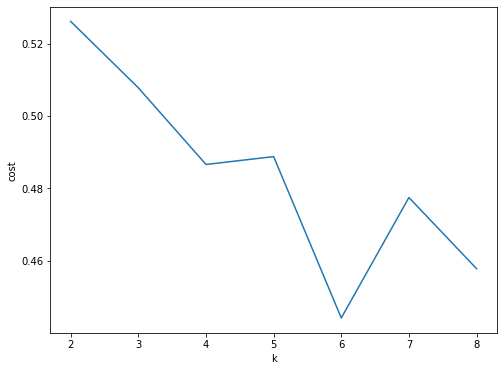

In [161]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,9),silhouette_score)
ax.set_xlabel("k")
ax.set_ylabel("cost")

In [166]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 6.6 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [167]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
from pyspark.ml.functions import vector_to_array

df_kmeans = predictions3.select((vector_to_array(col('pca_features'))[0]).alias('x'),
                        (vector_to_array(col('pca_features'))[1]).alias('y'),
                         col('prediction').alias('label')).toPandas()

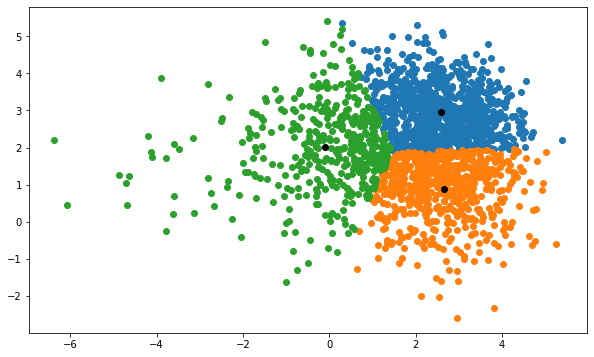

In [163]:
clusters = df_kmeans['label'].unique()

centroids = model3.clusterCenters()
  
fig = plt.figure()
ax = fig.add_subplot(111)

for i in list(clusters):
    t = df_kmeans.loc[df_kmeans['label']==i]
    ax.scatter(x=t['x'],y=t['y'],label=i)

for c in centroids:    
    ax.scatter(x=c[0],y=c[1],c='black')
       
plt.show()

### F. Can we find a model to predict popularity of a song based on music attributes? 

In [212]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
rf = RandomForestClassifier(featuresCol="pca_features",labelCol="popularity",maxDepth = 10)
rfModel = rf.fit(train_df)
rf.predictions = rfModel.transform(test_df)

In [213]:
rf.predictions.show()

+--------------------+----------+--------------------+--------------------+----------+
|        pca_features|popularity|       rawPrediction|         probability|prediction|
+--------------------+----------+--------------------+--------------------+----------+
|[-4.7144510752398...|        55|[0.32477871206818...|[0.01623893560340...|      74.0|
|[-4.6797703447567...|        63|[0.69241653175260...|[0.03462082658763...|      65.0|
|[-4.1950155863218...|        77|[0.38530118255728...|[0.01926505912786...|      83.0|
|[-3.7768076732673...|        60|[5.81311625156578...|[0.29065581257828...|       0.0|
|[-2.7474406812618...|        84|[0.80524242327193...|[0.04026212116359...|      75.0|
|[-2.6783329283732...|        68|[0.69241653175260...|[0.03462082658763...|      65.0|
|[-2.5078603389917...|        71|[1.06966265441875...|[0.05348313272093...|      58.0|
|[-2.4944728834779...|         0|[2.52413419913419...|[0.12620670995670...|      58.0|
|[-2.3466550637252...|        48|[0.3247787

In [214]:
rfModel.featureImportances

SparseVector(2, {0: 0.5302, 1: 0.4698})

In [215]:
evaluator = MulticlassClassificationEvaluator(labelCol="popularity", predictionCol="prediction")
accuracy = evaluator.evaluate(rf.predictions)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.023610733810255677
Test Error = 0.9763892661897443


In [222]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'vector_features', labelCol='popularity', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [3.8426372970611853,0.0,1.4127757478773477,-0.7144728208458003,-5.702286665507793,0.017291922734525393,0.0,0.2372662885227762,-0.21239023839455562,5.6245686435195195,0.01147027819681535,0.0]
Intercept: 55.78015848853321


In [223]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 21.739897
r2: 0.006112
